In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("metrics.csv")

In [3]:
import pandas as pd

# Load the CSV file
file_path = 'metrics.csv'
df = pd.read_csv(file_path)

# Filter for 'agglomerative' in 'Unnamed: 0'
agglo_df = df[df['Unnamed: 0'].str.contains('agglomerative')]

# Extract relevant columns for easier handling
agglo_df = agglo_df[[
    'Unnamed: 0', 'boosting_acc', 'boosting_f1', 'boosting_auc'
]]

# Extract the k value and embedding name from the 'Unnamed: 0' column
agglo_df['k'] = agglo_df['Unnamed: 0'].apply(lambda x: int(x.split(', ')[0].split(': ')[1]))
agglo_df['Embedding'] = agglo_df['Unnamed: 0'].apply(lambda x: x.split(', ')[-1].split(': ')[-1])

# Pivot the DataFrame to get the structure for the LaTeX table
pivoted_df = agglo_df.pivot_table(index='k', columns='Embedding', values=['boosting_acc', 'boosting_f1', 'boosting_auc'])

# Rename the columns to match the desired multi-index structure
pivoted_df.columns = pd.MultiIndex.from_tuples([(emb, metric) for metric, emb in pivoted_df.columns])

# Convert the DataFrame to LaTeX format
latex_table = pivoted_df.to_latex(multicolumn=True, multirow=True)

# Save the LaTeX table to a file
with open('table.tex', 'w') as file:
    file.write(latex_table)

# Display the LaTeX table code
print(latex_table)

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
 & BERT & average_word_embeddings_glove.6B.300d & average_word_embeddings_glove.840B.300d & average_word_embeddings_komninos & average_word_embeddings_levy_dependency & fasttext & jinaai-jina-embeddings-v2-base-en & mistral-embed & msmarco-bert-base-dot-v5 & multi-qa-mpnet-base-dot-v1 & text-embedding-3-large & text-embedding-3-small & word2vec & BERT & average_word_embeddings_glove.6B.300d & average_word_embeddings_glove.840B.300d & average_word_embeddings_komninos & average_word_embeddings_levy_dependency & fasttext & jinaai-jina-embeddings-v2-base-en & mistral-embed & msmarco-bert-base-dot-v5 & multi-qa-mpnet-base-dot-v1 & text-embedding-3-large & text-embedding-3-small & word2vec & BERT & average_word_embeddings_glove.6B.300d & average_word_embeddings_glove.840B.300d & average_word_embeddings_komninos & average_word_embeddings_levy_dependency & fasttext & jinaai-jina-embeddings-v2-base-en & mistral-embed & msmarco-b

In [4]:
df.head(40)

Unnamed: 0  num_suppressed_records  \
0          k: 2, clustering: kmeans,  embedding: BERT                    2261   
1      k: 2, clustering: kmeans,  embedding: word2vec                    1416   
2   k: 2, clustering: kmeans,  embedding: average_...                    1572   
3   k: 2, clustering: kmeans,  embedding: msmarco-...                    1509   
4   k: 2, clustering: kmeans,  embedding: multi-qa...                    1416   
5   k: 2, clustering: kmeans,  embedding: text-emb...                    1416   
6   k: 2, clustering: kmeans,  embedding: text-emb...                    1751   
7   k: 2, clustering: kmeans,  embedding: mistral-...                    1416   
8   k: 2, clustering: kmeans,  embedding: jinaai-j...                    1416   
9      k: 2, clustering: kmeans,  embedding: fasttext                    2215   
10  k: 2, clustering: kmeans,  embedding: average_...                    1416   
11  k: 2, clustering: kmeans,  embedding: average_...                    1894   
12  k: 2, clustering: kmeans,  embedding: average_...                    1520   
13  k: 2, clustering: agglomerative,  embedding: BERT                    2312   
14  k: 2, clustering: agglomerative,  embedding: w...                    2220   
15  k: 2, clustering: agglomerative,  embedding: a...                    1906   
16  k: 2, clustering: agglomerative,  embedding: m...                    2249   
17  k: 2, clustering: agglomerative,  embedding: m...                    2265   
18  k: 2, clustering: agglomerative,  embedding: t...                    1948   
19  k: 2, clustering: agglomerative,  embedding: t...                    1602   
20  k: 2, clustering: agglomerative,  embedding: m...                    1909   
21  k: 2, clustering: agglomerative,  embedding: j...                    1837   
22  k: 2, clustering: agglomerative,  embedding: f...                    2066   
23  k: 2, clustering: agglomerative,  embedding: a...                    1657   
24  k: 2, clustering: agglomerative,  embedding: a...                    2204   
25  k: 2, clustering: agglomerative,  embedding: a...                    1474   
26         k: 5, clustering: kmeans,  embedding: BERT                    2709   
27     k: 5, clustering: kmeans,  embedding: word2vec                    1559   
28  k: 5, clustering: kmeans,  embedding: average_...                    1962   
29  k: 5, clustering: kmeans,  embedding: msmarco-...                    1756   
30  k: 5, clustering: kmeans,  embedding: multi-qa...                    1416   
31  k: 5, clustering: kmeans,  embedding: text-emb...                    1416   
32  k: 5, clustering: kmeans,  embedding: text-emb...                    2069   
33  k: 5, clustering: kmeans,  embedding: mistral-...                    1416   
34  k: 5, clustering: kmeans,  embedding: jinaai-j...                    1416   
35     k: 5, clustering: kmeans,  embedding: fasttext                    2654   
36  k: 5, clustering: kmeans,  embedding: average_...                    1416   
37  k: 5, clustering: kmeans,  embedding: average_...                    1639   
38  k: 5, clustering: kmeans,  embedding: average_...                    1858   
39  k: 5, clustering: agglomerative,  embedding: BERT                    2729   

    num_records  max_group_size  avg_group_size  k  l         t  perc_recs  \
0         30300            2021       68.863636  2  2  0.736926   0.930561   
1         31145            1281       70.945330  2  2  0.710095   0.956512   
2         30989            1416       69.171875  2  2  0.707713   0.951721   
3         31052            1416       73.582938  2  2  0.683301   0.953656   
4         31145            1027       68.002183  2  2  0.710095   0.956512   
5         31145            1109       72.599068  2  2  0.710095   0.956512   
6         30810            1416       69.235955  2  2  0.704280   0.946224   
7         31145            1031       72.599068  2  2  0.710095   0.956512   
8         31145    

In [5]:
baseline = df[df.iloc[:, 0].str.contains('baseline')]

In [6]:
bert = df[df.iloc[:, 0].str.contains('BERT')]
kmeans_bert = bert[bert.iloc[:, 0].str.contains('kmeans')]
aggl_bert = bert[bert.iloc[:, 0].str.contains('agglomerative')]

In [7]:
mistralEmb = df[df.iloc[:, 0].str.contains('mistral')]
kmeans_mistral = mistralEmb[mistralEmb.iloc[:, 0].str.contains('kmeans')]
aggl_mistral = mistralEmb[mistralEmb.iloc[:, 0].str.contains('agglomerative')]

In [8]:
textEmbedding3Large = df[df.iloc[:, 0].str.contains('text-embedding-3-large')]
kmeans_textEmbedding3Large = textEmbedding3Large[textEmbedding3Large.iloc[:, 0].str.contains('kmeans')]
aggl_textEmbedding3Large = textEmbedding3Large[textEmbedding3Large.iloc[:, 0].str.contains('agglomerative')]

In [9]:
textEmbedding3Small = df[df.iloc[:, 0].str.contains('text-embedding-3-small')]
kmeans_textEmbedding3Small = textEmbedding3Small[textEmbedding3Small.iloc[:, 0].str.contains('kmeans')]
aggl_textEmbedding3Small = textEmbedding3Small[textEmbedding3Small.iloc[:, 0].str.contains('agglomerative')]

In [10]:
word2vec = df[df.iloc[:, 0].str.contains('word2vec')]
kmeans_word2vec = word2vec[word2vec.iloc[:, 0].str.contains('kmeans')]
aggl_word2vec = word2vec[word2vec.iloc[:, 0].str.contains('agglomerative')]

In [11]:
fasttext = df[df.iloc[:, 0].str.contains('fasttext')]
kmeans_fasttext = fasttext[fasttext.iloc[:, 0].str.contains('kmeans')]
aggl_fasttext = fasttext[fasttext.iloc[:, 0].str.contains('agglomerative')]

In [12]:
averagewordembeddingsglove6B300d = df[df.iloc[:, 0].str.contains('average_word_embeddings_glove.6B.300d')]
kmeans_averagewordembeddingsglove6B300d = averagewordembeddingsglove6B300d[averagewordembeddingsglove6B300d.iloc[:, 0].str.contains('kmeans')]
aggl_averagewordembeddingsglove6B300d = averagewordembeddingsglove6B300d[averagewordembeddingsglove6B300d.iloc[:, 0].str.contains('agglomerative')]

In [13]:
averagewordembeddingsglove840B300d = df[df.iloc[:, 0].str.contains('average_word_embeddings_glove.840B.300d')]
kmeans_averagewordembeddingsglove840B300d = averagewordembeddingsglove840B300d[averagewordembeddingsglove840B300d.iloc[:, 0].str.contains('kmeans')]
aggl_averagewordembeddingsglove840B300d = averagewordembeddingsglove840B300d[averagewordembeddingsglove840B300d.iloc[:, 0].str.contains('agglomerative')]

In [14]:
msMarcoBertBaseDotV5 = df[df.iloc[:, 0].str.contains('msmarco-bert-base-dot-v5')]
kmeans_msMarcoBertBaseDotV5 = msMarcoBertBaseDotV5[msMarcoBertBaseDotV5.iloc[:, 0].str.contains('kmeans')]
aggl_msMarcoBertBaseDotV5 = msMarcoBertBaseDotV5[msMarcoBertBaseDotV5.iloc[:, 0].str.contains('agglomerative')]

In [15]:
multiQaMpnetBaseDotV1 = df[df.iloc[:, 0].str.contains('multi-qa-mpnet-base-dot-v1')]
kmeans_multiQaMpnetBaseDotV1 = multiQaMpnetBaseDotV1[multiQaMpnetBaseDotV1.iloc[:, 0].str.contains('kmeans')]
aggl_multiQaMpnetBaseDotV1 = multiQaMpnetBaseDotV1[multiQaMpnetBaseDotV1.iloc[:, 0].str.contains('agglomerative')]

In [16]:
jinaaiJinaEmbeddingsV2BaseEn = df[df.iloc[:, 0].str.contains('jinaai-jina-embeddings-v2-base-en')]
kmeans_jinaaiJinaEmbeddingsV2BaseEn = jinaaiJinaEmbeddingsV2BaseEn[jinaaiJinaEmbeddingsV2BaseEn.iloc[:, 0].str.contains('kmeans')]
aggl_jinaaiJinaEmbeddingsV2BaseEn = jinaaiJinaEmbeddingsV2BaseEn[jinaaiJinaEmbeddingsV2BaseEn.iloc[:, 0].str.contains('agglomerative')]

In [17]:
averageWordEmbeddingsKomninos = df[df.iloc[:, 0].str.contains('average_word_embeddings_komninos')]
kmeans_averageWordEmbeddingsKomninos = averageWordEmbeddingsKomninos[averageWordEmbeddingsKomninos.iloc[:, 0].str.contains('kmeans')]
aggl_averageWordEmbeddingsKomninos = averageWordEmbeddingsKomninos[averageWordEmbeddingsKomninos.iloc[:, 0].str.contains('agglomerative')]

In [18]:
averageWordEmbeddingsLevyDependency = df[df.iloc[:, 0].str.contains('average_word_embeddings_levy_dependency')]
kmeans_averageWordEmbeddingsLevyDependency = averageWordEmbeddingsLevyDependency[averageWordEmbeddingsLevyDependency.iloc[:, 0].str.contains('kmeans')]
aggl_averageWordEmbeddingsLevyDependency = averageWordEmbeddingsLevyDependency[averageWordEmbeddingsLevyDependency.iloc[:, 0].str.contains('agglomerative')]

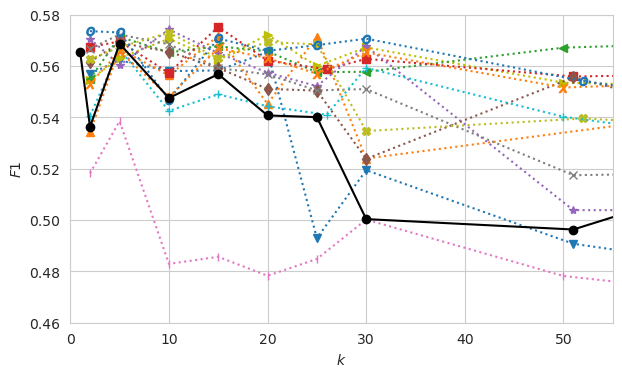

In [19]:
plt.figure(figsize=(7,4))
row_start = 0
row_end = 20

df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.46, ymax=0.58)
plt.xlim(xmin=0, xmax=55)

plt.plot(baseline['k'][:], baseline['boosting_f1'][:], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$F1$')
plt.grid(True)

# plt.legend(loc='upper right', fontsize=7, framealpha=0.3)

plt.savefig('f1_small.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [20]:
pivoted_df

BERT average_word_embeddings_glove.6B.300d  \
    boosting_acc                          boosting_acc   
k                                                        
2       0.841042                              0.838093   
5       0.839690                              0.840366   
10      0.818500                              0.829495   
15      0.836067                              0.834531   
20      0.841103                              0.831091   
25      0.839875                              0.832197   
30      0.830662                              0.834040   
50      0.840120                              0.832258   
100     0.832013                              0.832320   
150     0.832197                              0.833794   
200     0.830969                              0.833241   

    average_word_embeddings_glove.840B.300d average_word_embeddings_komninos  \
                               boosting_acc                     boosting_acc   
k                                                                              
2                                  0.835145                         0.838523   
5                                  0.830846                         0.838585   
10                                 0.839875                         0.839015   
15                                 0.833733                         0.838216   
20                                 0.833303                         0.836251   
25                                 0.834654                         0.840059   
30                                 0.838708                         0.834654   
50                                 0.838401                         0.837479   
100                                0.833733                         0.833671   
150                                0.830232                         0.831337   
200                                0.833425                         0.833241   

    average_word_embeddings_levy_dependency     fasttext  \
                               boosting_acc boosting_acc   
k                                                          
2                                  0.837971     0.832320   
5                                  0.839629     0.835575   
10                                 0.838032     0.839383   
15                                 0.833487     0.825195   
20                                 0.839506     0.837172   
25                                 0.839813     0.838646   
30                                 0.840489     0.835207   
50                                 0.825564     0.836681   
100                                0.830784     0.831951   
150                                0.832996     0.835821   
200                                0.831153     0.834531   

    jinaai-jina-embeddings-v2-base-en mistral-embed msmarco-bert-base-dot-v5  \
                         boosting_acc  boosting_acc             boosting_acc   
k                                                                              
2                            0.836374      0.837971                 0.831583   
5                            0.842024      0.839813                 0.838523   
10                           0.838093      0.833610                 0.826362   
15                           0.837725      0.840120                 0.836926   
20                           0.834961      0.838155                 0.834347   
25                           0.840059      0.833548                 0.835145   
30                           0.833548      0.827898                 0.835330   
50                           0.836619      0.835759                 0.832996   
100                          0.835575      0.836804                 0.833118   
150                          0.834900      0.830416                 0.831890   
200                          0.833425      0.825195                 0.834777   

    multi-qa-mpnet-base-dot-v1  ... average_word_embeddings_komninos  \
                  boosting_acc  ...         

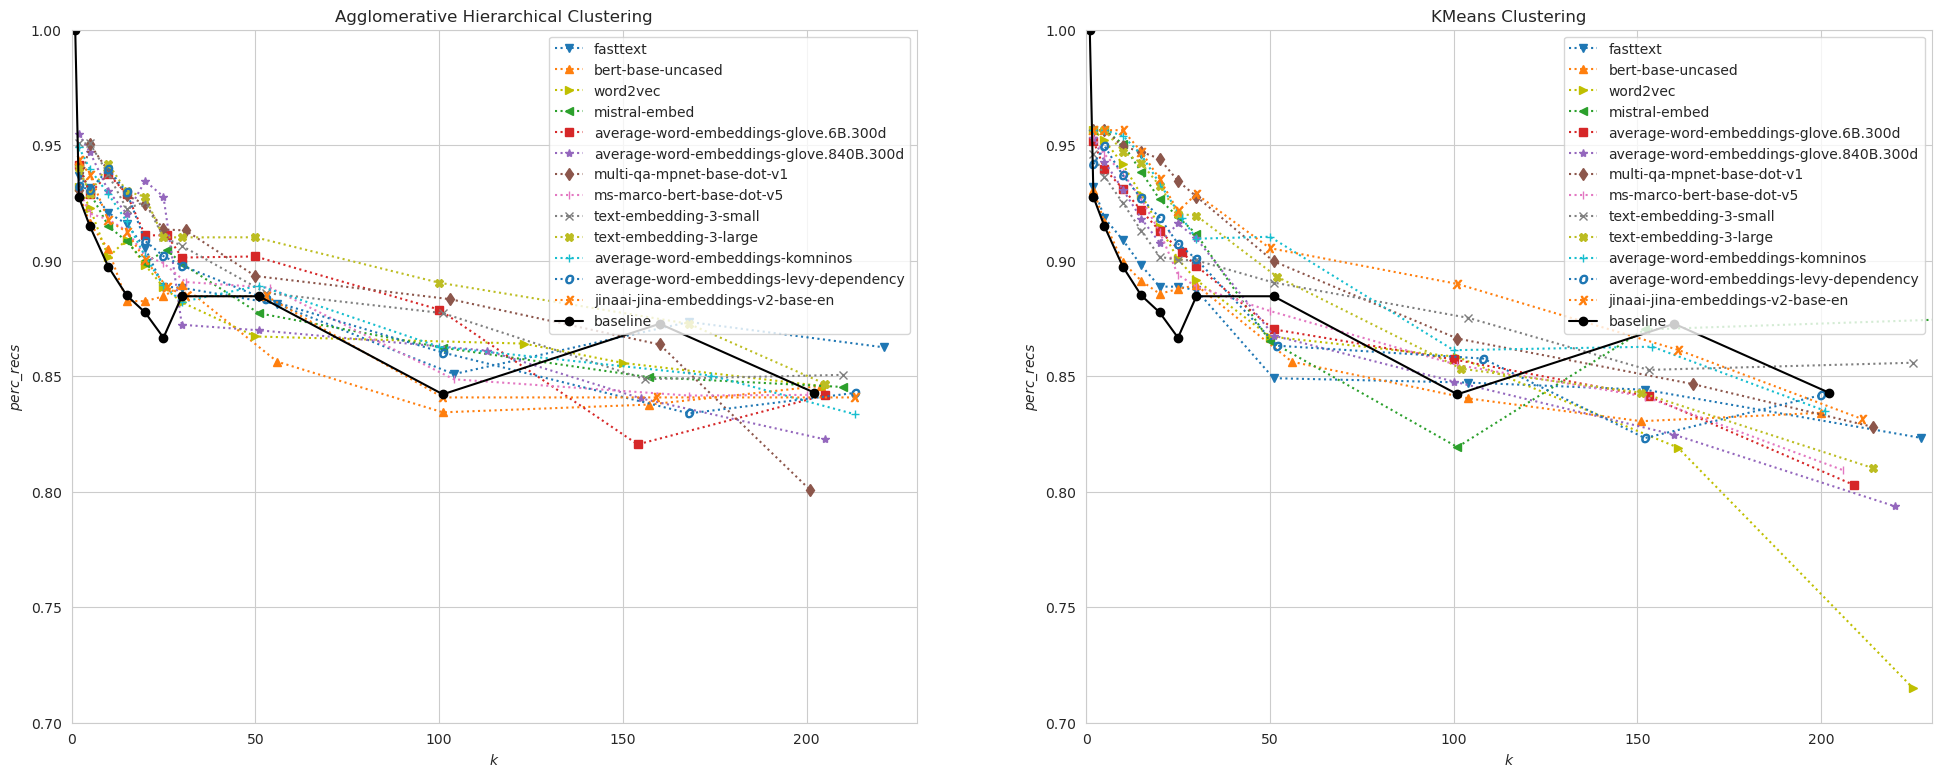

In [21]:
import matplotlib.pyplot as plt

# Define the figure and the two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

# Plot the first set of data
ax1.plot(aggl_fasttext['k'][:], aggl_fasttext['perc_recs'][:], label="fasttext", linestyle=':', marker='v')
ax1.plot(aggl_bert['k'][:], aggl_bert['perc_recs'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax1.plot(aggl_word2vec['k'][:], aggl_word2vec['perc_recs'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax1.plot(aggl_mistral['k'][:], aggl_mistral['perc_recs'][:], label="mistral-embed", linestyle=':', marker='<')
ax1.plot(aggl_averagewordembeddingsglove6B300d['k'][:], aggl_averagewordembeddingsglove6B300d['perc_recs'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax1.plot(aggl_averagewordembeddingsglove840B300d['k'][:], aggl_averagewordembeddingsglove840B300d['perc_recs'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax1.plot(aggl_multiQaMpnetBaseDotV1['k'][:], aggl_multiQaMpnetBaseDotV1['perc_recs'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax1.plot(aggl_msMarcoBertBaseDotV5['k'][:], aggl_msMarcoBertBaseDotV5['perc_recs'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax1.plot(aggl_textEmbedding3Small['k'][:], aggl_textEmbedding3Small['perc_recs'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax1.plot(aggl_textEmbedding3Large['k'][:], aggl_textEmbedding3Large['perc_recs'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax1.plot(aggl_averageWordEmbeddingsKomninos['k'][:], aggl_averageWordEmbeddingsKomninos['perc_recs'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax1.plot(aggl_averageWordEmbeddingsLevyDependency['k'][:], aggl_averageWordEmbeddingsLevyDependency['perc_recs'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax1.plot(aggl_jinaaiJinaEmbeddingsV2BaseEn['k'][:], aggl_jinaaiJinaEmbeddingsV2BaseEn['perc_recs'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax1.plot(baseline['k'][:], baseline['perc_recs'][:], label='baseline', linestyle='-', marker='o', color='black')

ax1.set_ylim(ymin=0.7, ymax=1.0)
ax1.set_xlim(xmin=0, xmax=230)
ax1.set_xlabel('$k$')
ax1.set_ylabel('$perc\_recs$')
ax1.grid(True)
ax1.legend(loc='upper right')
ax1.set_title('Agglomerative Hierarchical Clustering')

# Plot the second set of data
ax2.plot(kmeans_fasttext['k'][:], kmeans_fasttext['perc_recs'][:], label="fasttext", linestyle=':', marker='v')
ax2.plot(kmeans_bert['k'][:], kmeans_bert['perc_recs'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax2.plot(kmeans_word2vec['k'][:], kmeans_word2vec['perc_recs'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax2.plot(kmeans_mistral['k'][:], kmeans_mistral['perc_recs'][:], label="mistral-embed", linestyle=':', marker='<')
ax2.plot(kmeans_averagewordembeddingsglove6B300d['k'][:], kmeans_averagewordembeddingsglove6B300d['perc_recs'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax2.plot(kmeans_averagewordembeddingsglove840B300d['k'][:], kmeans_averagewordembeddingsglove840B300d['perc_recs'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax2.plot(kmeans_multiQaMpnetBaseDotV1['k'][:], kmeans_multiQaMpnetBaseDotV1['perc_recs'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax2.plot(kmeans_msMarcoBertBaseDotV5['k'][:], kmeans_msMarcoBertBaseDotV5['perc_recs'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax2.plot(kmeans_textEmbedding3Small['k'][:], kmeans_textEmbedding3Small['perc_recs'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax2.plot(kmeans_textEmbedding3Large['k'][:], kmeans_textEmbedding3Large['perc_recs'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax2.plot(kmeans_averageWordEmbeddingsKomninos['k'][:], kmeans_averageWordEmbeddingsKomninos['perc_recs'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax2.plot(kmeans_averageWordEmbeddingsLevyDependency['k'][:], kmeans_averageWordEmbeddingsLevyDependency['perc_recs'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax2.plot(kmeans_jinaaiJinaEmbeddingsV2BaseEn['k'][:], kmeans_jinaaiJinaEmbeddingsV2BaseEn['perc_recs'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax2.plot(baseline['k'][:], baseline['perc_recs'][:], label='baseline', linestyle='-', marker='o', color='black')

ax2.set_ylim(ymin=0.7, ymax=1.0)
ax2.set_xlim(xmin=0, xmax=230)
ax2.set_xlabel('$k$')
ax2.set_ylabel('$perc\_recs$')
ax2.grid(True)
ax2.legend(loc='upper right')
ax2.set_title('KMeans Clustering')

plt.savefig('perc_recs.png', dpi=300, bbox_inches='tight', pad_inches=1)

# Show the plot
plt.show()


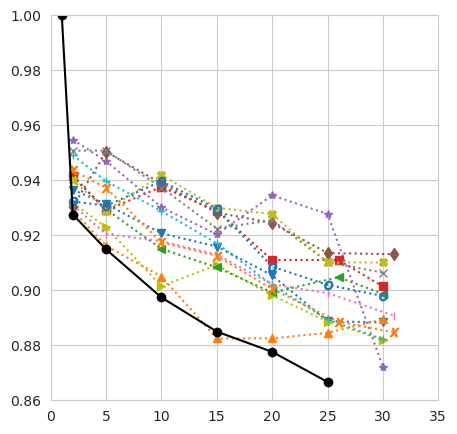

In [22]:
plt.figure(figsize=(5, 5))
row_start = 0
row_end = 7

df = aggl_fasttext
name = "fasttext"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='v')

df = aggl_bert
name = "bert-base-uncased"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='^')

df = aggl_word2vec
name = "word2vec"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='>', color="y")

df = aggl_mistral
name = "mistral-embed"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='<')

df = aggl_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='s')

df = aggl_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='*')

df = aggl_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='d')

df = aggl_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='|')

df = aggl_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='x')

df = aggl_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='X')

df = aggl_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='+')

df = aggl_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='$O$')

df = aggl_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.86, ymax=1)
plt.xlim(xmin=0, xmax=35)
plt.plot(baseline['k'][row_start:row_end], baseline['perc_recs'][row_start:row_end], label='baseline', linestyle='-', marker='o', color='black')


# plt.xlabel('$k$')
# plt.ylabel('$perc_recs$')
plt.grid(True)

plt.savefig('perc_recs_aggl_0-30--boosting.png', dpi=300)

# plt.legend(loc='lower right')
plt.show()

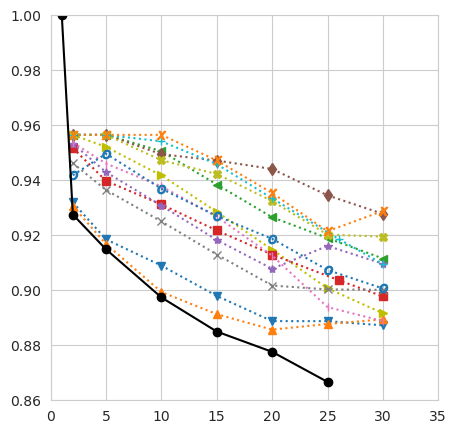

In [23]:
plt.figure(figsize=(5, 5))
row_start = 0
row_end = 7

df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][row_start:row_end], df['perc_recs'][row_start:row_end], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.86, ymax=1)
plt.xlim(xmin=0, xmax=35)
plt.plot(baseline['k'][row_start:row_end], baseline['perc_recs'][row_start:row_end], label='baseline', linestyle='-', marker='o', color='black')

plt.savefig('perc_recs_kmeans_0-30--boosting.png', dpi=300)

# plt.xlabel('$k$')
# plt.ylabel('$perc_recs$')
plt.grid(True)
# plt.legend(loc='lower right')
plt.show()

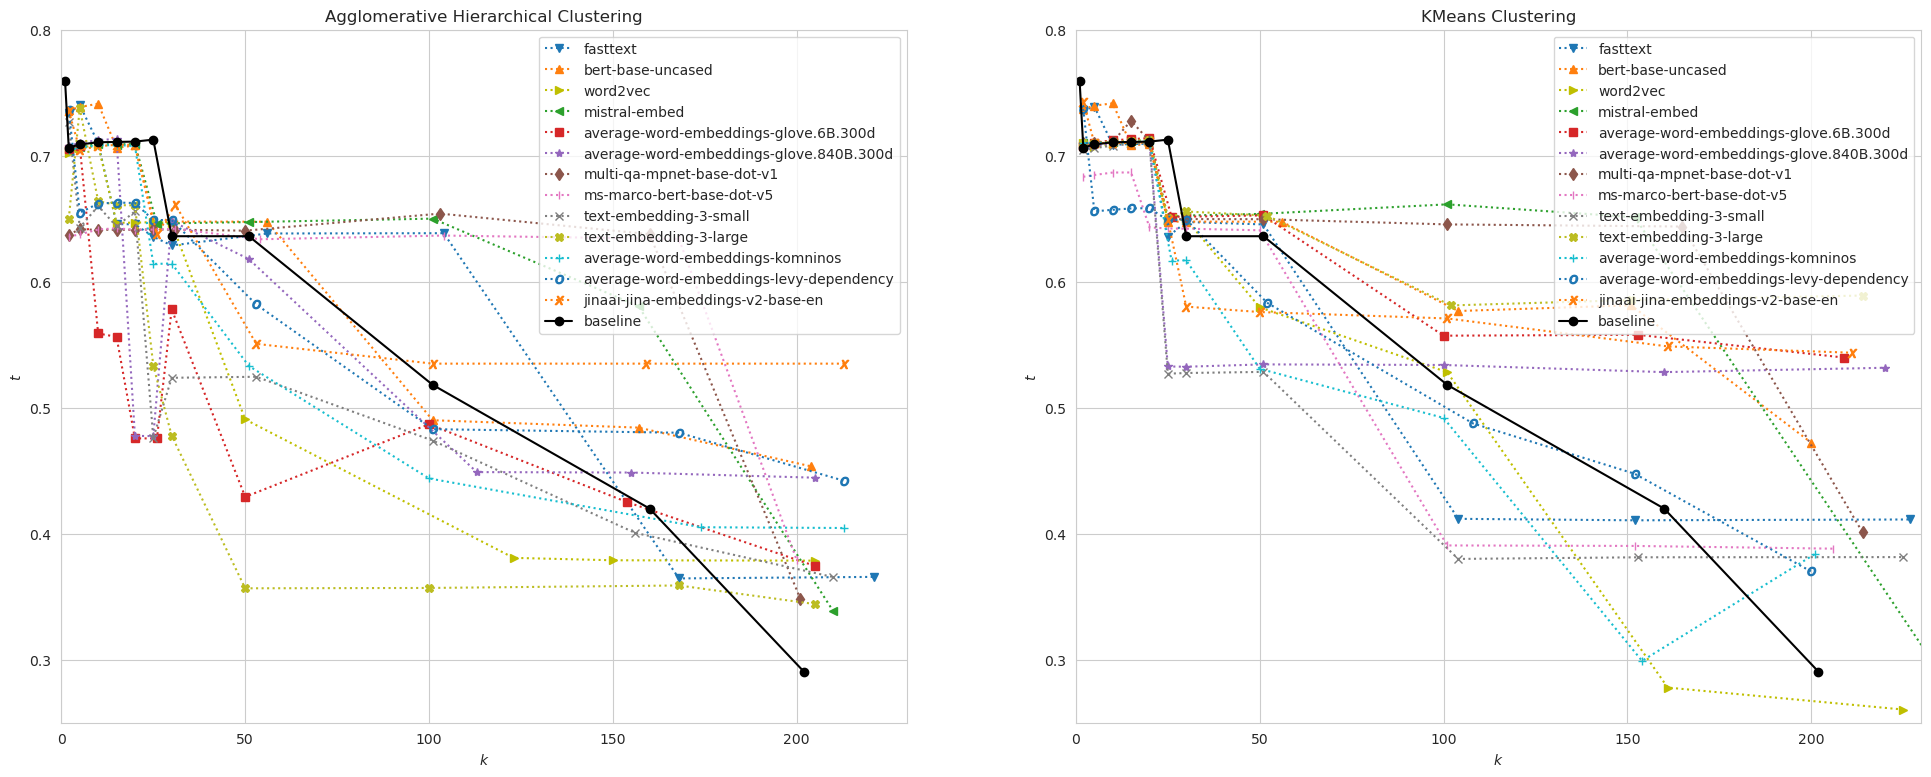

In [24]:
import matplotlib.pyplot as plt

# Define the figure and the two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

# Plot the first set of data
ax1.plot(aggl_fasttext['k'][:], aggl_fasttext['t'][:], label="fasttext", linestyle=':', marker='v')
ax1.plot(aggl_bert['k'][:], aggl_bert['t'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax1.plot(aggl_word2vec['k'][:], aggl_word2vec['t'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax1.plot(aggl_mistral['k'][:], aggl_mistral['t'][:], label="mistral-embed", linestyle=':', marker='<')
ax1.plot(aggl_averagewordembeddingsglove6B300d['k'][:], aggl_averagewordembeddingsglove6B300d['t'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax1.plot(aggl_averagewordembeddingsglove840B300d['k'][:], aggl_averagewordembeddingsglove840B300d['t'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax1.plot(aggl_multiQaMpnetBaseDotV1['k'][:], aggl_multiQaMpnetBaseDotV1['t'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax1.plot(aggl_msMarcoBertBaseDotV5['k'][:], aggl_msMarcoBertBaseDotV5['t'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax1.plot(aggl_textEmbedding3Small['k'][:], aggl_textEmbedding3Small['t'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax1.plot(aggl_textEmbedding3Large['k'][:], aggl_textEmbedding3Large['t'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax1.plot(aggl_averageWordEmbeddingsKomninos['k'][:], aggl_averageWordEmbeddingsKomninos['t'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax1.plot(aggl_averageWordEmbeddingsLevyDependency['k'][:], aggl_averageWordEmbeddingsLevyDependency['t'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax1.plot(aggl_jinaaiJinaEmbeddingsV2BaseEn['k'][:], aggl_jinaaiJinaEmbeddingsV2BaseEn['t'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax1.plot(baseline['k'][:], baseline['t'][:], label='baseline', linestyle='-', marker='o', color='black')

ax1.set_ylim(ymin=0.25, ymax=0.80)
ax1.set_xlim(xmin=0, xmax=230)
ax1.set_xlabel('$k$')
ax1.set_ylabel('$t$')
ax1.grid(True)
ax1.legend(loc='upper right')
ax1.set_title('Agglomerative Hierarchical Clustering')

# Plot the second set of data
ax2.plot(kmeans_fasttext['k'][:], kmeans_fasttext['t'][:], label="fasttext", linestyle=':', marker='v')
ax2.plot(kmeans_bert['k'][:], kmeans_bert['t'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax2.plot(kmeans_word2vec['k'][:], kmeans_word2vec['t'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax2.plot(kmeans_mistral['k'][:], kmeans_mistral['t'][:], label="mistral-embed", linestyle=':', marker='<')
ax2.plot(kmeans_averagewordembeddingsglove6B300d['k'][:], kmeans_averagewordembeddingsglove6B300d['t'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax2.plot(kmeans_averagewordembeddingsglove840B300d['k'][:], kmeans_averagewordembeddingsglove840B300d['t'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax2.plot(kmeans_multiQaMpnetBaseDotV1['k'][:], kmeans_multiQaMpnetBaseDotV1['t'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax2.plot(kmeans_msMarcoBertBaseDotV5['k'][:], kmeans_msMarcoBertBaseDotV5['t'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax2.plot(kmeans_textEmbedding3Small['k'][:], kmeans_textEmbedding3Small['t'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax2.plot(kmeans_textEmbedding3Large['k'][:], kmeans_textEmbedding3Large['t'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax2.plot(kmeans_averageWordEmbeddingsKomninos['k'][:], kmeans_averageWordEmbeddingsKomninos['t'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax2.plot(kmeans_averageWordEmbeddingsLevyDependency['k'][:], kmeans_averageWordEmbeddingsLevyDependency['t'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax2.plot(kmeans_jinaaiJinaEmbeddingsV2BaseEn['k'][:], kmeans_jinaaiJinaEmbeddingsV2BaseEn['t'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax2.plot(baseline['k'][:], baseline['t'][:], label='baseline', linestyle='-', marker='o', color='black')

ax2.set_ylim(ymin=0.25, ymax=0.80)
ax2.set_xlim(xmin=0, xmax=230)
ax2.set_xlabel('$k$')
ax2.set_ylabel('$t$')
ax2.grid(True)
ax2.legend(loc='upper right')
ax2.set_title('KMeans Clustering')

plt.savefig('t.png', dpi=300, bbox_inches='tight', pad_inches=1)

# Show the plot
plt.show()


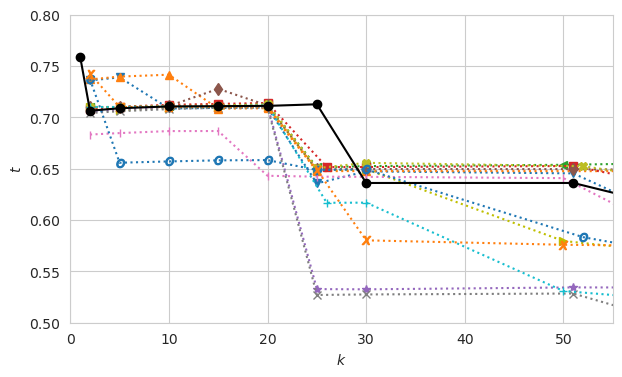

In [25]:

plt.figure(figsize=(7,4))
row_start = 0
row_end = 20

df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.5, ymax=0.8)
plt.xlim(xmin=0, xmax=55)

plt.plot(baseline['k'][:], baseline['t'][:], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$t$')
plt.grid(True)
# plt.legend(loc='upper right')

plt.savefig('t_small.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

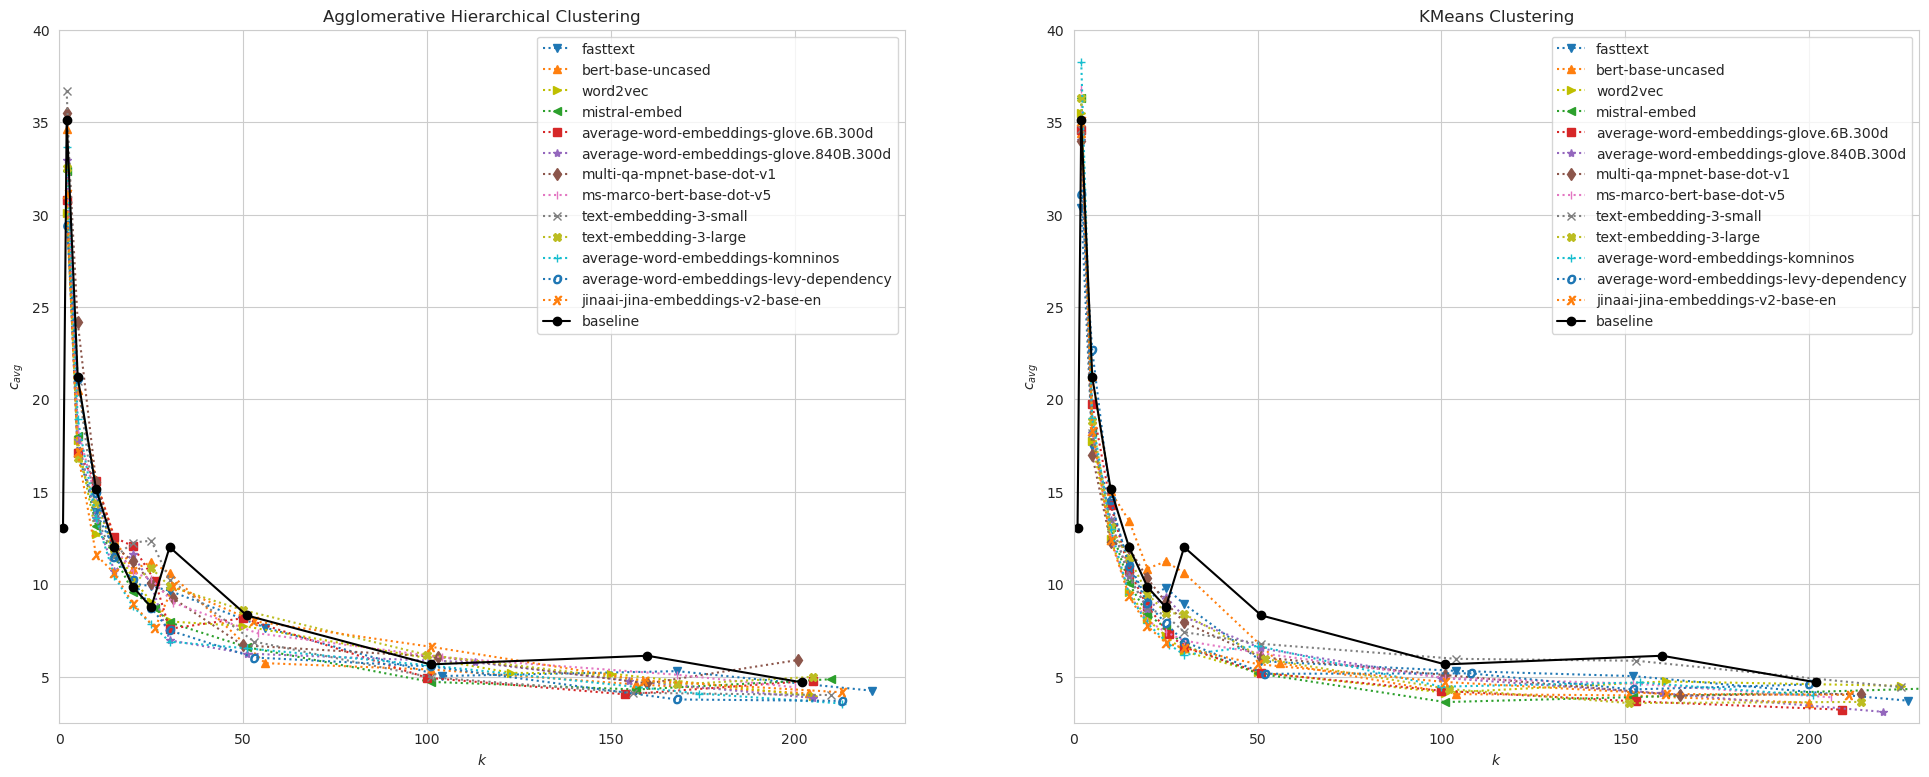

In [26]:
import matplotlib.pyplot as plt

# Define the figure and the two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

# Plot the first set of data
ax1.plot(aggl_fasttext['k'][:], aggl_fasttext['c_avg'][:], label="fasttext", linestyle=':', marker='v')
ax1.plot(aggl_bert['k'][:], aggl_bert['c_avg'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax1.plot(aggl_word2vec['k'][:], aggl_word2vec['c_avg'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax1.plot(aggl_mistral['k'][:], aggl_mistral['c_avg'][:], label="mistral-embed", linestyle=':', marker='<')
ax1.plot(aggl_averagewordembeddingsglove6B300d['k'][:], aggl_averagewordembeddingsglove6B300d['c_avg'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax1.plot(aggl_averagewordembeddingsglove840B300d['k'][:], aggl_averagewordembeddingsglove840B300d['c_avg'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax1.plot(aggl_multiQaMpnetBaseDotV1['k'][:], aggl_multiQaMpnetBaseDotV1['c_avg'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax1.plot(aggl_msMarcoBertBaseDotV5['k'][:], aggl_msMarcoBertBaseDotV5['c_avg'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax1.plot(aggl_textEmbedding3Small['k'][:], aggl_textEmbedding3Small['c_avg'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax1.plot(aggl_textEmbedding3Large['k'][:], aggl_textEmbedding3Large['c_avg'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax1.plot(aggl_averageWordEmbeddingsKomninos['k'][:], aggl_averageWordEmbeddingsKomninos['c_avg'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax1.plot(aggl_averageWordEmbeddingsLevyDependency['k'][:], aggl_averageWordEmbeddingsLevyDependency['c_avg'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax1.plot(aggl_jinaaiJinaEmbeddingsV2BaseEn['k'][:], aggl_jinaaiJinaEmbeddingsV2BaseEn['c_avg'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax1.plot(baseline['k'][:], baseline['c_avg'][:], label='baseline', linestyle='-', marker='o', color='black')

ax1.set_ylim(ymin=2.5, ymax=40)
ax1.set_xlim(xmin=0, xmax=230)
ax1.set_xlabel('$k$')
ax1.set_ylabel('$c_{avg}$')
ax1.grid(True)
ax1.legend(loc='upper right')
ax1.set_title('Agglomerative Hierarchical Clustering')

# Plot the second set of data
ax2.plot(kmeans_fasttext['k'][:], kmeans_fasttext['c_avg'][:], label="fasttext", linestyle=':', marker='v')
ax2.plot(kmeans_bert['k'][:], kmeans_bert['c_avg'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax2.plot(kmeans_word2vec['k'][:], kmeans_word2vec['c_avg'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax2.plot(kmeans_mistral['k'][:], kmeans_mistral['c_avg'][:], label="mistral-embed", linestyle=':', marker='<')
ax2.plot(kmeans_averagewordembeddingsglove6B300d['k'][:], kmeans_averagewordembeddingsglove6B300d['c_avg'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax2.plot(kmeans_averagewordembeddingsglove840B300d['k'][:], kmeans_averagewordembeddingsglove840B300d['c_avg'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax2.plot(kmeans_multiQaMpnetBaseDotV1['k'][:], kmeans_multiQaMpnetBaseDotV1['c_avg'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax2.plot(kmeans_msMarcoBertBaseDotV5['k'][:], kmeans_msMarcoBertBaseDotV5['c_avg'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax2.plot(kmeans_textEmbedding3Small['k'][:], kmeans_textEmbedding3Small['c_avg'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax2.plot(kmeans_textEmbedding3Large['k'][:], kmeans_textEmbedding3Large['c_avg'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax2.plot(kmeans_averageWordEmbeddingsKomninos['k'][:], kmeans_averageWordEmbeddingsKomninos['c_avg'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax2.plot(kmeans_averageWordEmbeddingsLevyDependency['k'][:], kmeans_averageWordEmbeddingsLevyDependency['c_avg'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax2.plot(kmeans_jinaaiJinaEmbeddingsV2BaseEn['k'][:], kmeans_jinaaiJinaEmbeddingsV2BaseEn['c_avg'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax2.plot(baseline['k'][:], baseline['c_avg'][:], label='baseline', linestyle='-', marker='o', color='black')

ax2.set_ylim(ymin=2.5, ymax=40)
ax2.set_xlim(xmin=0, xmax=230)
ax2.set_xlabel('$k$')
ax2.set_ylabel('$c_{avg}$')
ax2.grid(True)
ax2.legend(loc='upper right')
ax2.set_title('KMeans Clustering')

plt.savefig('c_avg.png', dpi=300, bbox_inches='tight', pad_inches=1)

# Show the plot
plt.show()


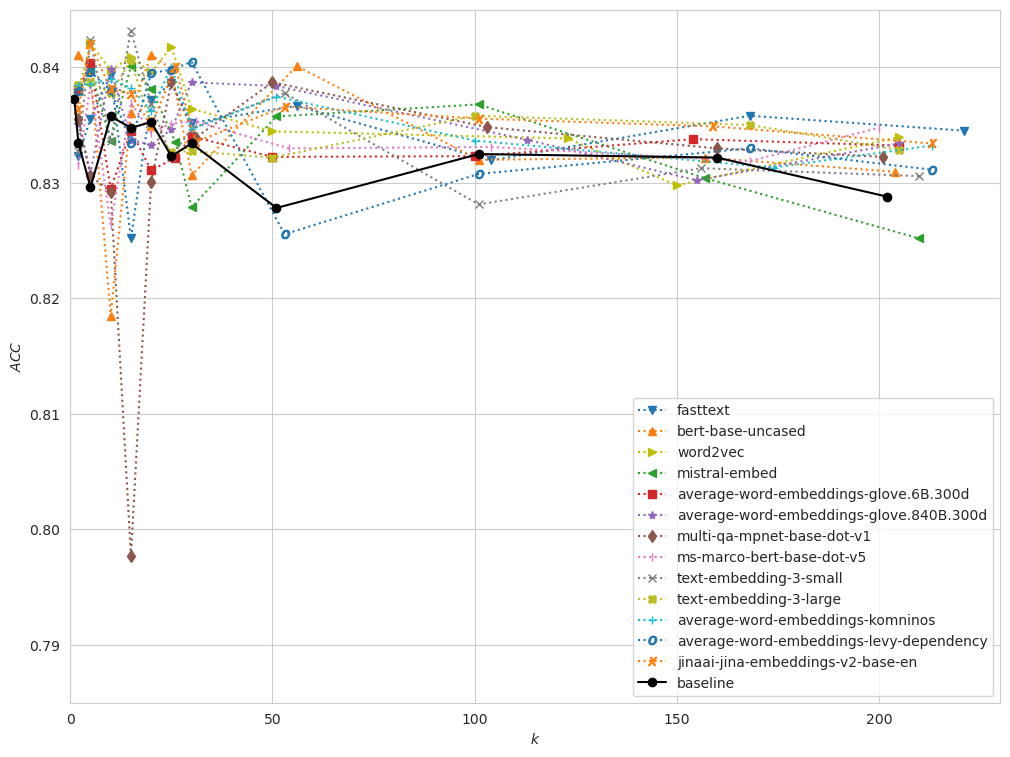

In [27]:
plt.figure(figsize=(12, 9))
row_start = 0
row_end = 20
  
df = aggl_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='v')

df = aggl_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='^')

df = aggl_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='>', color="y")

df = aggl_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='<')

df = aggl_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='s')

df = aggl_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='*')

df = aggl_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='d')

df = aggl_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='|')

df = aggl_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='x')

df = aggl_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='X')

df = aggl_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='+')

df = aggl_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='$O$')

df = aggl_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='$X$')

plt.plot(baseline['k'][:], baseline['boosting_acc'][:], label='baseline', linestyle='-', marker='o', color='black')

plt.ylim(ymin=0.785, ymax=0.845) 
plt.xlim(xmin=0, xmax=230) 

plt.xlabel('$k$')
plt.ylabel('$ACC$')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

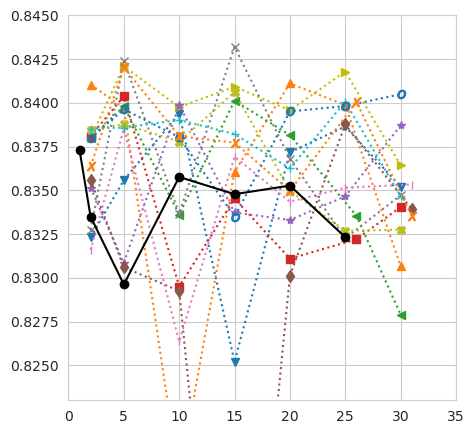

In [28]:
plt.figure(figsize=(5, 5))
row_start = 0
row_end = 7
  
df = aggl_fasttext
name = "fasttext"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='v')

df = aggl_bert
name = "bert-base-uncased"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='^')

df = aggl_word2vec
name = "word2vec"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='>', color="y")

df = aggl_mistral
name = "mistral-embed"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='<')

df = aggl_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='s')

df = aggl_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='*')

df = aggl_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='d')

df = aggl_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='|')

df = aggl_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='x')

df = aggl_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='X')

df = aggl_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='+')

df = aggl_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='$O$')

df = aggl_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.823, ymax=0.845) 
plt.xlim(xmin=0, xmax=35) 
plt.plot(baseline['k'][row_start:row_end], baseline['boosting_acc'][row_start:row_end], label='baseline', linestyle='-', marker='o', color='black')


# plt.xlabel('$k$')
# plt.ylabel('$ACC$')
plt.grid(True)
# plt.legend(loc='lower right')
plt.show()

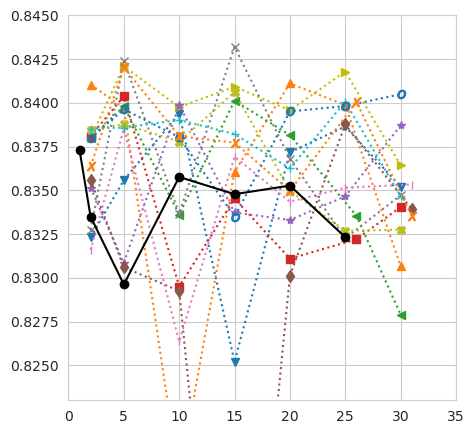

In [29]:
plt.figure(figsize=(5, 5))
row_start = 0
row_end = 7

df = aggl_fasttext
name = "fasttext"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='v')

df = aggl_bert
name = "bert-base-uncased"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='^')

df = aggl_word2vec
name = "word2vec"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='>', color="y")

df = aggl_mistral
name = "mistral-embed"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='<')

df = aggl_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='s')

df = aggl_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='*')

df = aggl_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='d')

df = aggl_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='|')

df = aggl_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='x')

df = aggl_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='X')

df = aggl_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='+')

df = aggl_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='$O$')

df = aggl_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.823, ymax=0.845)
plt.xlim(xmin=0, xmax=35)
plt.plot(baseline['k'][row_start:row_end], baseline['boosting_acc'][row_start:row_end], label='baseline', linestyle='-', marker='o', color='black')


# plt.xlabel('$k$')
# plt.ylabel('$ACC$')
plt.grid(True)
plt.savefig('acc_aggl_0-30--boosting.png', dpi=300)

# plt.legend(loc='lower right')
plt.show()

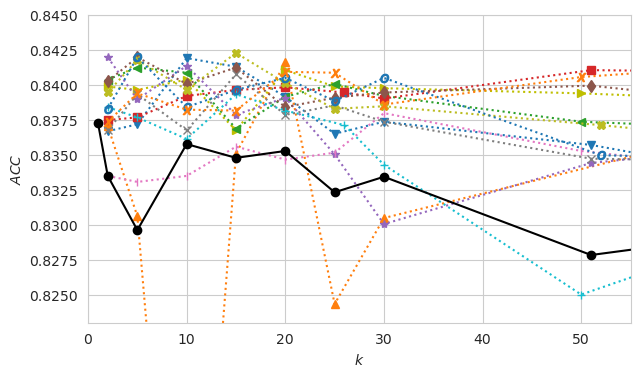

In [30]:
plt.figure(figsize=(7, 4))
row_start = 0
row_end = 20

df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][row_start:row_end], df['boosting_acc'][row_start:row_end], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.823, ymax=0.845)
plt.xlim(xmin=0, xmax=55)
plt.plot(baseline['k'][row_start:row_end], baseline['boosting_acc'][row_start:row_end], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$ACC$')
plt.grid(True)
plt.savefig('acc_kmeans_0-50--boosting.png', dpi=300, bbox_inches='tight', pad_inches=0.1)


# plt.legend(loc='lower right')
plt.show()

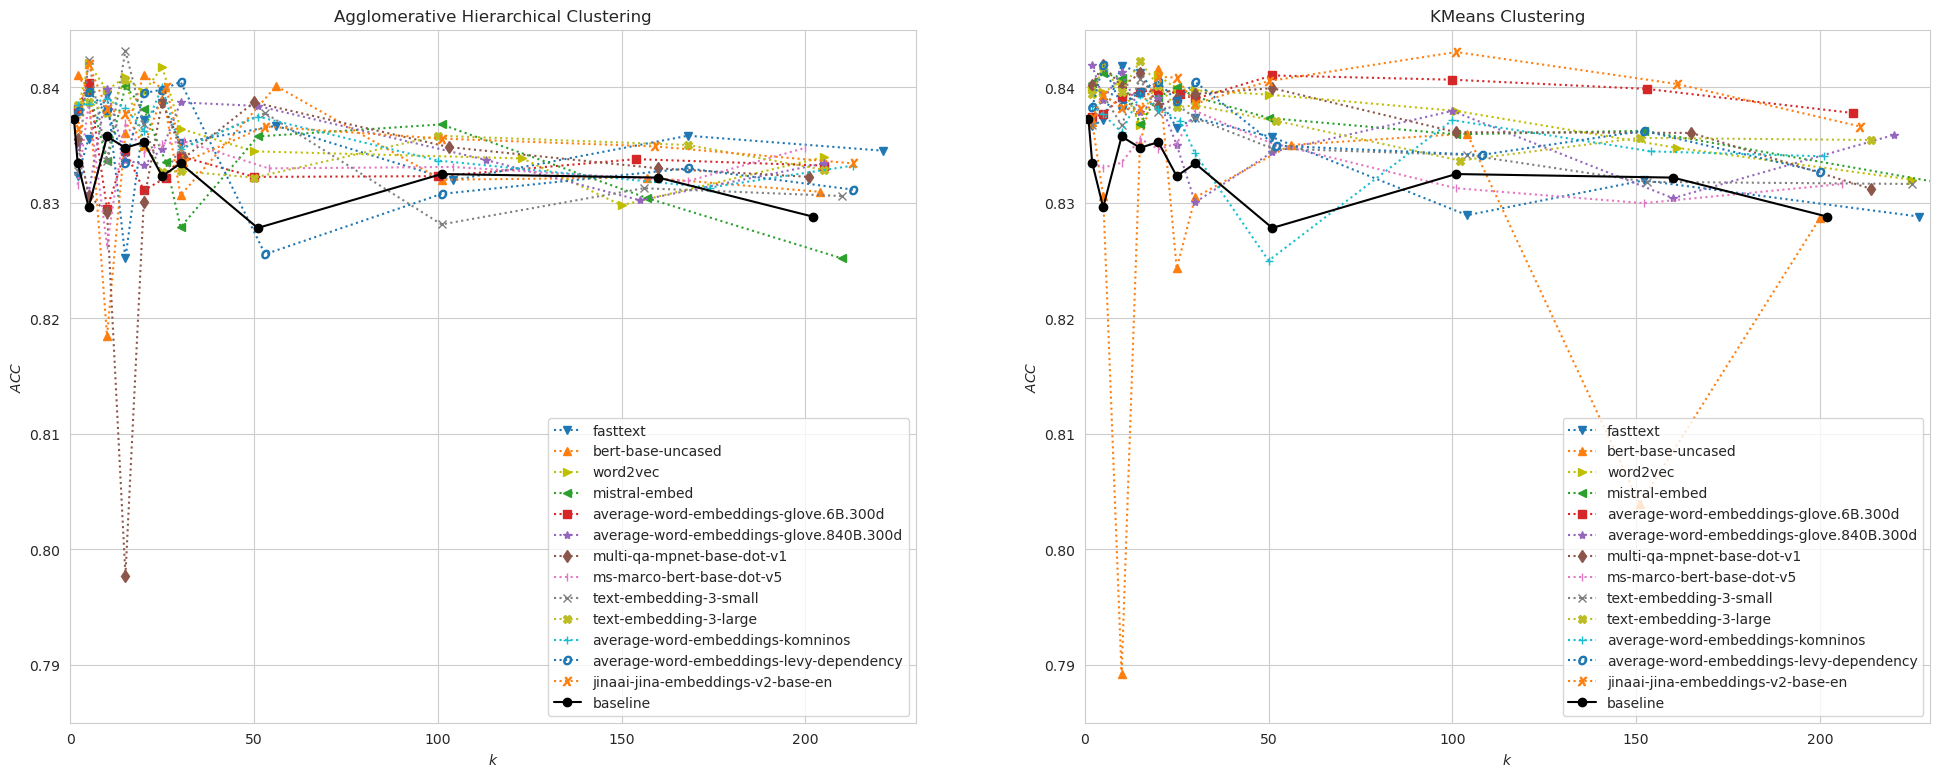

In [31]:
import matplotlib.pyplot as plt

# Define the figure and the two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

# Plot the first set of data
ax1.plot(aggl_fasttext['k'][:], aggl_fasttext['boosting_acc'][:], label="fasttext", linestyle=':', marker='v')
ax1.plot(aggl_bert['k'][:], aggl_bert['boosting_acc'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax1.plot(aggl_word2vec['k'][:], aggl_word2vec['boosting_acc'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax1.plot(aggl_mistral['k'][:], aggl_mistral['boosting_acc'][:], label="mistral-embed", linestyle=':', marker='<')
ax1.plot(aggl_averagewordembeddingsglove6B300d['k'][:], aggl_averagewordembeddingsglove6B300d['boosting_acc'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax1.plot(aggl_averagewordembeddingsglove840B300d['k'][:], aggl_averagewordembeddingsglove840B300d['boosting_acc'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax1.plot(aggl_multiQaMpnetBaseDotV1['k'][:], aggl_multiQaMpnetBaseDotV1['boosting_acc'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax1.plot(aggl_msMarcoBertBaseDotV5['k'][:], aggl_msMarcoBertBaseDotV5['boosting_acc'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax1.plot(aggl_textEmbedding3Small['k'][:], aggl_textEmbedding3Small['boosting_acc'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax1.plot(aggl_textEmbedding3Large['k'][:], aggl_textEmbedding3Large['boosting_acc'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax1.plot(aggl_averageWordEmbeddingsKomninos['k'][:], aggl_averageWordEmbeddingsKomninos['boosting_acc'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax1.plot(aggl_averageWordEmbeddingsLevyDependency['k'][:], aggl_averageWordEmbeddingsLevyDependency['boosting_acc'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax1.plot(aggl_jinaaiJinaEmbeddingsV2BaseEn['k'][:], aggl_jinaaiJinaEmbeddingsV2BaseEn['boosting_acc'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax1.plot(baseline['k'][:], baseline['boosting_acc'][:], label='baseline', linestyle='-', marker='o', color='black')

ax1.set_ylim(ymin=0.785, ymax=0.845)
ax1.set_xlim(xmin=0, xmax=230)
ax1.set_xlabel('$k$')
ax1.set_ylabel('$ACC$')
ax1.grid(True)
ax1.legend(loc='lower right')
ax1.set_title('Agglomerative Hierarchical Clustering')

# Plot the second set of data
ax2.plot(kmeans_fasttext['k'][:], kmeans_fasttext['boosting_acc'][:], label="fasttext", linestyle=':', marker='v')
ax2.plot(kmeans_bert['k'][:], kmeans_bert['boosting_acc'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax2.plot(kmeans_word2vec['k'][:], kmeans_word2vec['boosting_acc'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax2.plot(kmeans_mistral['k'][:], kmeans_mistral['boosting_acc'][:], label="mistral-embed", linestyle=':', marker='<')
ax2.plot(kmeans_averagewordembeddingsglove6B300d['k'][:], kmeans_averagewordembeddingsglove6B300d['boosting_acc'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax2.plot(kmeans_averagewordembeddingsglove840B300d['k'][:], kmeans_averagewordembeddingsglove840B300d['boosting_acc'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax2.plot(kmeans_multiQaMpnetBaseDotV1['k'][:], kmeans_multiQaMpnetBaseDotV1['boosting_acc'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax2.plot(kmeans_msMarcoBertBaseDotV5['k'][:], kmeans_msMarcoBertBaseDotV5['boosting_acc'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax2.plot(kmeans_textEmbedding3Small['k'][:], kmeans_textEmbedding3Small['boosting_acc'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax2.plot(kmeans_textEmbedding3Large['k'][:], kmeans_textEmbedding3Large['boosting_acc'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax2.plot(kmeans_averageWordEmbeddingsKomninos['k'][:], kmeans_averageWordEmbeddingsKomninos['boosting_acc'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax2.plot(kmeans_averageWordEmbeddingsLevyDependency['k'][:], kmeans_averageWordEmbeddingsLevyDependency['boosting_acc'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax2.plot(kmeans_jinaaiJinaEmbeddingsV2BaseEn['k'][:], kmeans_jinaaiJinaEmbeddingsV2BaseEn['boosting_acc'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax2.plot(baseline['k'][:], baseline['boosting_acc'][:], label='baseline', linestyle='-', marker='o', color='black')

ax2.set_ylim(ymin=0.785, ymax=0.845)
ax2.set_xlim(xmin=0, xmax=230)
ax2.set_xlabel('$k$')
ax2.set_ylabel('$ACC$')
ax2.grid(True)
ax2.legend(loc='lower right')
ax2.set_title('KMeans Clustering')

plt.savefig('acc.png', dpi=300, bbox_inches='tight', pad_inches=1)

# Show the plot
plt.show()


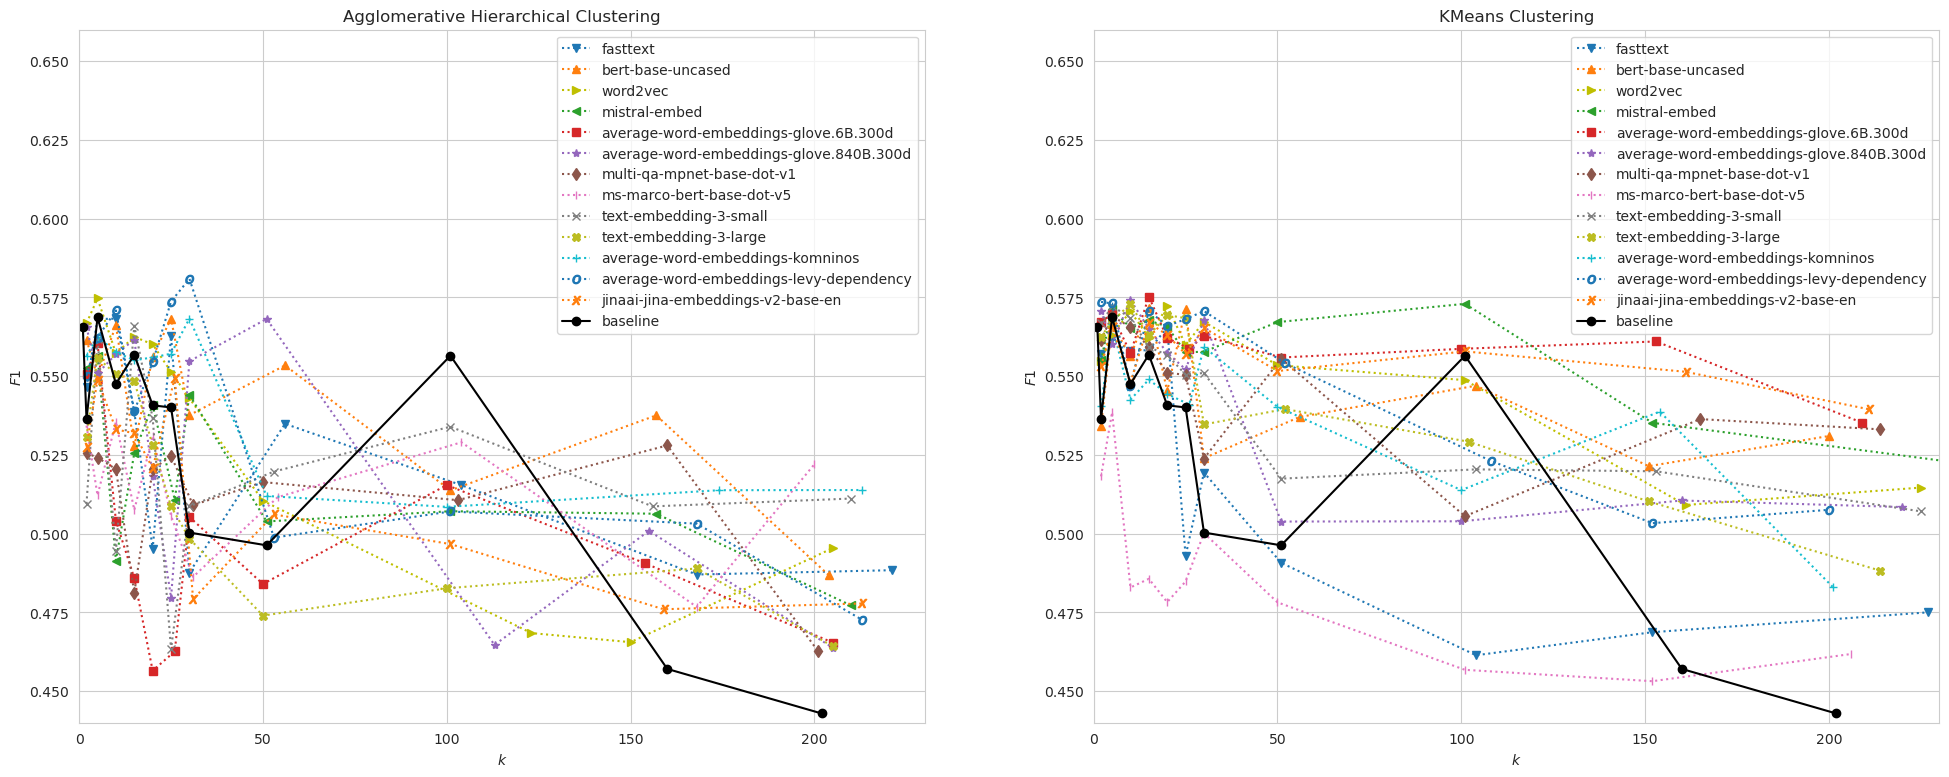

In [32]:
import matplotlib.pyplot as plt

# Define the figure and the two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

# Plot the first set of data
ax1.plot(aggl_fasttext['k'][:], aggl_fasttext['boosting_f1'][:], label="fasttext", linestyle=':', marker='v')
ax1.plot(aggl_bert['k'][:], aggl_bert['boosting_f1'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax1.plot(aggl_word2vec['k'][:], aggl_word2vec['boosting_f1'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax1.plot(aggl_mistral['k'][:], aggl_mistral['boosting_f1'][:], label="mistral-embed", linestyle=':', marker='<')
ax1.plot(aggl_averagewordembeddingsglove6B300d['k'][:], aggl_averagewordembeddingsglove6B300d['boosting_f1'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax1.plot(aggl_averagewordembeddingsglove840B300d['k'][:], aggl_averagewordembeddingsglove840B300d['boosting_f1'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax1.plot(aggl_multiQaMpnetBaseDotV1['k'][:], aggl_multiQaMpnetBaseDotV1['boosting_f1'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax1.plot(aggl_msMarcoBertBaseDotV5['k'][:], aggl_msMarcoBertBaseDotV5['boosting_f1'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax1.plot(aggl_textEmbedding3Small['k'][:], aggl_textEmbedding3Small['boosting_f1'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax1.plot(aggl_textEmbedding3Large['k'][:], aggl_textEmbedding3Large['boosting_f1'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax1.plot(aggl_averageWordEmbeddingsKomninos['k'][:], aggl_averageWordEmbeddingsKomninos['boosting_f1'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax1.plot(aggl_averageWordEmbeddingsLevyDependency['k'][:], aggl_averageWordEmbeddingsLevyDependency['boosting_f1'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax1.plot(aggl_jinaaiJinaEmbeddingsV2BaseEn['k'][:], aggl_jinaaiJinaEmbeddingsV2BaseEn['boosting_f1'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax1.plot(baseline['k'][:], baseline['boosting_f1'][:], label='baseline', linestyle='-', marker='o', color='black')

ax1.set_ylim(ymin=0.44, ymax=0.66)
ax1.set_xlim(xmin=0, xmax=230)

ax1.set_xlabel('$k$')
ax1.set_ylabel('$F1$')
ax1.grid(True)
ax1.legend(loc='upper right')
ax1.set_title('Agglomerative Hierarchical Clustering')

# Plot the second set of data
ax2.plot(kmeans_fasttext['k'][:], kmeans_fasttext['boosting_f1'][:], label="fasttext", linestyle=':', marker='v')
ax2.plot(kmeans_bert['k'][:], kmeans_bert['boosting_f1'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax2.plot(kmeans_word2vec['k'][:], kmeans_word2vec['boosting_f1'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax2.plot(kmeans_mistral['k'][:], kmeans_mistral['boosting_f1'][:], label="mistral-embed", linestyle=':', marker='<')
ax2.plot(kmeans_averagewordembeddingsglove6B300d['k'][:], kmeans_averagewordembeddingsglove6B300d['boosting_f1'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax2.plot(kmeans_averagewordembeddingsglove840B300d['k'][:], kmeans_averagewordembeddingsglove840B300d['boosting_f1'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax2.plot(kmeans_multiQaMpnetBaseDotV1['k'][:], kmeans_multiQaMpnetBaseDotV1['boosting_f1'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax2.plot(kmeans_msMarcoBertBaseDotV5['k'][:], kmeans_msMarcoBertBaseDotV5['boosting_f1'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax2.plot(kmeans_textEmbedding3Small['k'][:], kmeans_textEmbedding3Small['boosting_f1'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax2.plot(kmeans_textEmbedding3Large['k'][:], kmeans_textEmbedding3Large['boosting_f1'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax2.plot(kmeans_averageWordEmbeddingsKomninos['k'][:], kmeans_averageWordEmbeddingsKomninos['boosting_f1'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax2.plot(kmeans_averageWordEmbeddingsLevyDependency['k'][:], kmeans_averageWordEmbeddingsLevyDependency['boosting_f1'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax2.plot(kmeans_jinaaiJinaEmbeddingsV2BaseEn['k'][:], kmeans_jinaaiJinaEmbeddingsV2BaseEn['boosting_f1'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax2.plot(baseline['k'][:], baseline['boosting_f1'][:], label='baseline', linestyle='-', marker='o', color='black')


ax2.set_ylim(ymin=0.44, ymax=0.66)
ax2.set_xlim(xmin=0, xmax=230)

ax2.set_xlabel('$k$')
ax2.set_ylabel('$F1$')
ax2.grid(True)
ax2.legend(loc='upper right')
ax2.set_title('KMeans Clustering')

plt.savefig('F1.png', dpi=300, bbox_inches='tight', pad_inches=1)

# Show the plot
plt.show()


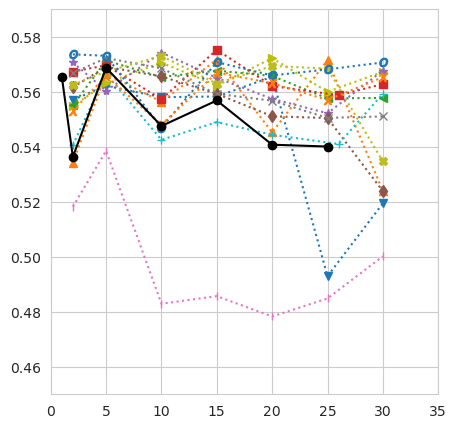

In [33]:
plt.figure(figsize=(5, 5))
row_start = 0
row_end = 7

df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.45, ymax=0.59)
plt.xlim(xmin=0, xmax=35)
plt.plot(baseline['k'][row_start:row_end], baseline['boosting_f1'][row_start:row_end], label='baseline', linestyle='-', marker='o', color='black')

# plt.xlabel('$k$')
# plt.ylabel('$ACC$')
plt.grid(True)
plt.savefig('f1_kmeans_0-30--boosting.png', dpi=300)

# plt.legend(loc='lower right')
plt.show()

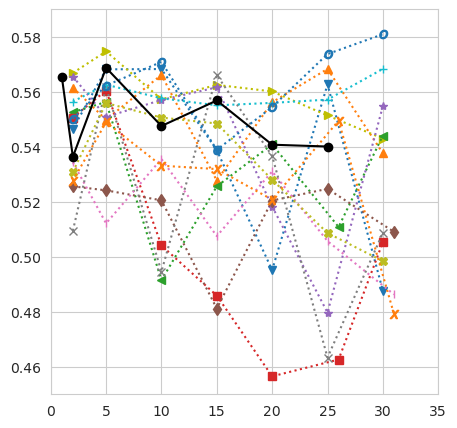

In [34]:
plt.figure(figsize=(5, 5))
row_start = 0
row_end = 7

df = aggl_fasttext
name = "fasttext"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='v')

df = aggl_bert
name = "bert-base-uncased"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='^')

df = aggl_word2vec
name = "word2vec"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='>', color="y")

df = aggl_mistral
name = "mistral-embed"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='<')

df = aggl_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='s')

df = aggl_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='*')

df = aggl_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='d')

df = aggl_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='|')

df = aggl_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='x')

df = aggl_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='X')

df = aggl_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='+')

df = aggl_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='$O$')

df = aggl_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][row_start:row_end], df['boosting_f1'][row_start:row_end], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.45, ymax=0.59)
plt.xlim(xmin=0, xmax=35)
plt.plot(baseline['k'][row_start:row_end], baseline['boosting_f1'][row_start:row_end], label='baseline', linestyle='-', marker='o', color='black')


# plt.xlabel('$k$')
# plt.ylabel('$ACC$')
plt.grid(True)
plt.savefig('f1_aggl_0-30--boosting.png', dpi=300)

# plt.legend(loc='lower right')
plt.show()

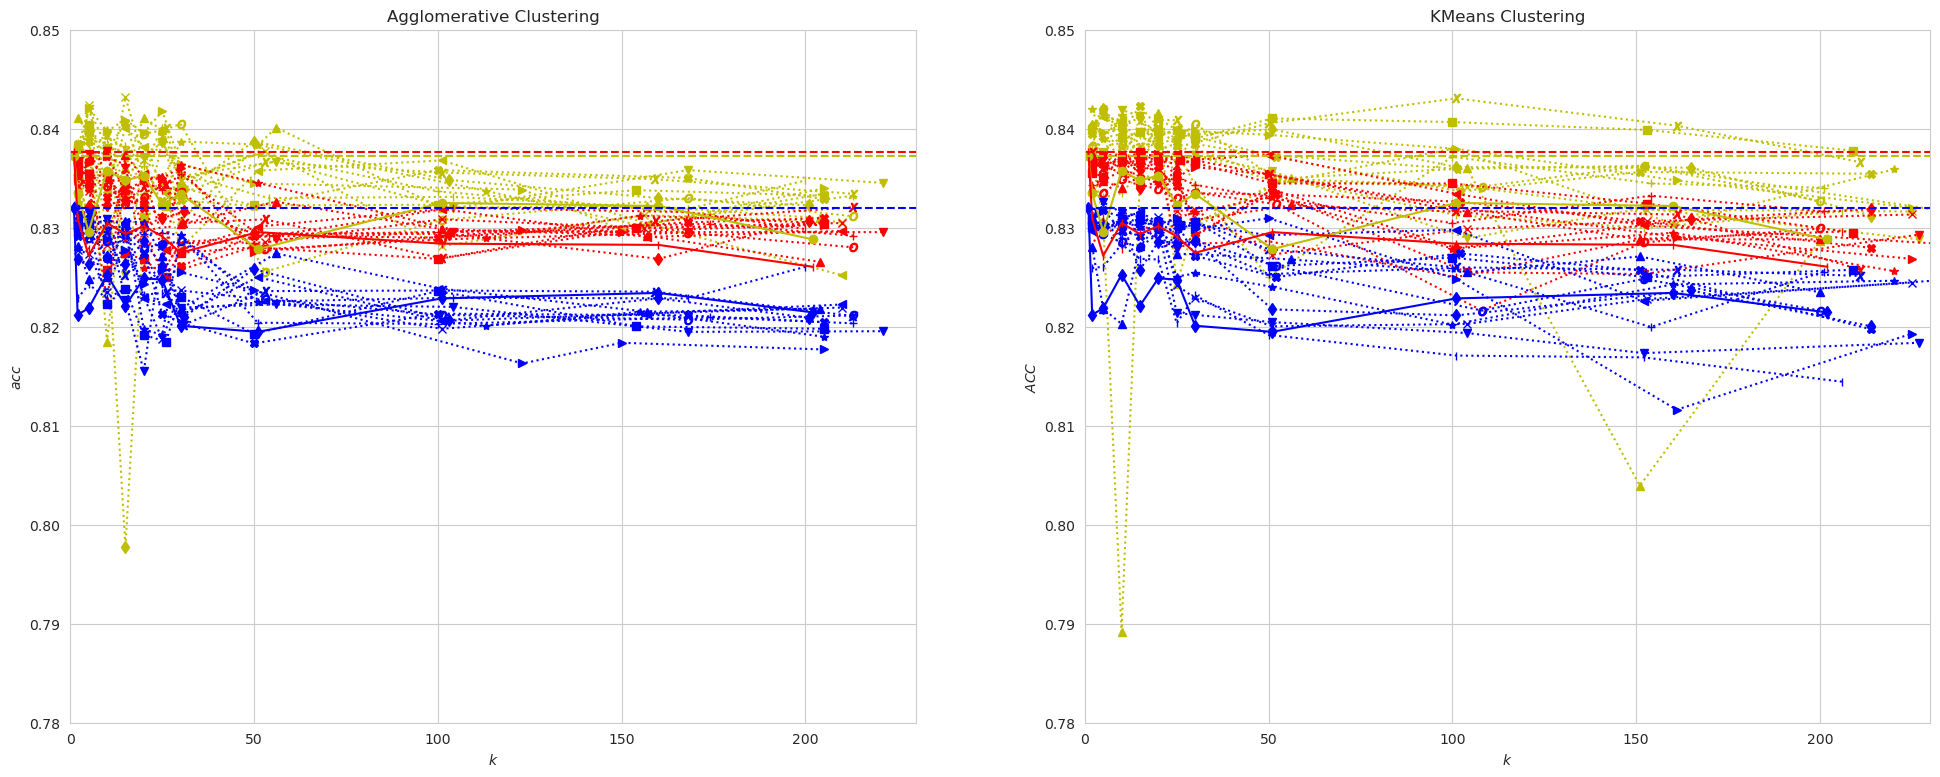

In [35]:
import matplotlib.pyplot as plt

# Define the figure and the two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

# Plot the first set of data
ax1.plot(aggl_fasttext['k'][:], aggl_fasttext['boosting_acc'][:], label="fasttext", linestyle=':', marker='v', color="y")
ax1.plot(aggl_bert['k'][:], aggl_bert['boosting_acc'][:], label="bert-base-uncased", linestyle=':', marker='^', color="y")
ax1.plot(aggl_word2vec['k'][:], aggl_word2vec['boosting_acc'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax1.plot(aggl_mistral['k'][:], aggl_mistral['boosting_acc'][:], label="mistral-embed", linestyle=':', marker='<', color="y")
ax1.plot(aggl_averagewordembeddingsglove6B300d['k'][:], aggl_averagewordembeddingsglove6B300d['boosting_acc'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s', color="y")
ax1.plot(aggl_averagewordembeddingsglove840B300d['k'][:], aggl_averagewordembeddingsglove840B300d['boosting_acc'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*', color="y")
ax1.plot(aggl_multiQaMpnetBaseDotV1['k'][:], aggl_multiQaMpnetBaseDotV1['boosting_acc'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d', color="y")
ax1.plot(aggl_msMarcoBertBaseDotV5['k'][:], aggl_msMarcoBertBaseDotV5['boosting_acc'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|', color="y")
ax1.plot(aggl_textEmbedding3Small['k'][:], aggl_textEmbedding3Small['boosting_acc'][:], label="text-embedding-3-small", linestyle=':', marker='x', color="y")
ax1.plot(aggl_textEmbedding3Large['k'][:], aggl_textEmbedding3Large['boosting_acc'][:], label="text-embedding-3-large", linestyle=':', marker='X', color="y")
ax1.plot(aggl_averageWordEmbeddingsKomninos['k'][:], aggl_averageWordEmbeddingsKomninos['boosting_acc'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+', color="y")
ax1.plot(aggl_averageWordEmbeddingsLevyDependency['k'][:], aggl_averageWordEmbeddingsLevyDependency['boosting_acc'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$', color="y")
ax1.plot(aggl_jinaaiJinaEmbeddingsV2BaseEn['k'][:], aggl_jinaaiJinaEmbeddingsV2BaseEn['boosting_acc'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$', color="y")

ax1.plot(aggl_fasttext['k'][:], aggl_fasttext['bagging_acc'][:], label="fasttext", linestyle=':', marker='v', color="r")
ax1.plot(aggl_bert['k'][:], aggl_bert['bagging_acc'][:], label="bert-base-uncased", linestyle=':', marker='^', color="r")
ax1.plot(aggl_word2vec['k'][:], aggl_word2vec['bagging_acc'][:], label="word2vec", linestyle=':', marker='>', color="r")
ax1.plot(aggl_mistral['k'][:], aggl_mistral['bagging_acc'][:], label="mistral-embed", linestyle=':', marker='<', color="r")
ax1.plot(aggl_averagewordembeddingsglove6B300d['k'][:], aggl_averagewordembeddingsglove6B300d['bagging_acc'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s', color="r")
ax1.plot(aggl_averagewordembeddingsglove840B300d['k'][:], aggl_averagewordembeddingsglove840B300d['bagging_acc'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*', color="r")
ax1.plot(aggl_multiQaMpnetBaseDotV1['k'][:], aggl_multiQaMpnetBaseDotV1['bagging_acc'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d', color="r")
ax1.plot(aggl_msMarcoBertBaseDotV5['k'][:], aggl_msMarcoBertBaseDotV5['bagging_acc'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|', color="r")
ax1.plot(aggl_textEmbedding3Small['k'][:], aggl_textEmbedding3Small['bagging_acc'][:], label="text-embedding-3-small", linestyle=':', marker='x', color="r")
ax1.plot(aggl_textEmbedding3Large['k'][:], aggl_textEmbedding3Large['bagging_acc'][:], label="text-embedding-3-large", linestyle=':', marker='X', color="r")
ax1.plot(aggl_averageWordEmbeddingsKomninos['k'][:], aggl_averageWordEmbeddingsKomninos['bagging_acc'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+', color="r")
ax1.plot(aggl_averageWordEmbeddingsLevyDependency['k'][:], aggl_averageWordEmbeddingsLevyDependency['bagging_acc'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$', color="r")
ax1.plot(aggl_jinaaiJinaEmbeddingsV2BaseEn['k'][:], aggl_jinaaiJinaEmbeddingsV2BaseEn['bagging_acc'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$', color="r")

ax1.plot(aggl_fasttext['k'][:], aggl_fasttext['random_forest_acc'][:], label="fasttext", linestyle=':', marker='v', color="b")
ax1.plot(aggl_bert['k'][:], aggl_bert['random_forest_acc'][:], label="bert-base-uncased", linestyle=':', marker='^', color="b")
ax1.plot(aggl_word2vec['k'][:], aggl_word2vec['random_forest_acc'][:], label="word2vec", linestyle=':', marker='>', color="b")
ax1.plot(aggl_mistral['k'][:], aggl_mistral['random_forest_acc'][:], label="mistral-embed", linestyle=':', marker='<', color="b")
ax1.plot(aggl_averagewordembeddingsglove6B300d['k'][:], aggl_averagewordembeddingsglove6B300d['random_forest_acc'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s', color="b")
ax1.plot(aggl_averagewordembeddingsglove840B300d['k'][:], aggl_averagewordembeddingsglove840B300d['random_forest_acc'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*', color="b")
ax1.plot(aggl_multiQaMpnetBaseDotV1['k'][:], aggl_multiQaMpnetBaseDotV1['random_forest_acc'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d', color="b")
ax1.plot(aggl_msMarcoBertBaseDotV5['k'][:], aggl_msMarcoBertBaseDotV5['random_forest_acc'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|', color="b")
ax1.plot(aggl_textEmbedding3Small['k'][:], aggl_textEmbedding3Small['random_forest_acc'][:], label="text-embedding-3-small", linestyle=':', marker='x', color="b")
ax1.plot(aggl_textEmbedding3Large['k'][:], aggl_textEmbedding3Large['random_forest_acc'][:], label="text-embedding-3-large", linestyle=':', marker='X', color="b")
ax1.plot(aggl_averageWordEmbeddingsKomninos['k'][:], aggl_averageWordEmbeddingsKomninos['random_forest_acc'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+', color="b")
ax1.plot(aggl_averageWordEmbeddingsLevyDependency['k'][:], aggl_averageWordEmbeddingsLevyDependency['random_forest_acc'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$', color="b")
ax1.plot(aggl_jinaaiJinaEmbeddingsV2BaseEn['k'][:], aggl_jinaaiJinaEmbeddingsV2BaseEn['random_forest_acc'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$', color="b")

ax1.plot(baseline['k'][:], baseline['boosting_acc'][:], label='baseline', linestyle='-', marker='o', color='y')
ax1.plot(baseline['k'][:], baseline['bagging_acc'][:], label='baseline', linestyle='-', marker='|', color='r')
ax1.plot(baseline['k'][:], baseline['random_forest_acc'][:], label='baseline', linestyle='-', marker='d', color='b')

ax1.axhline(y=0.8372950064492353, color='y', linestyle='--', label='baseline w/o anonymization and boosting')
ax1.axhline(y=0.8376021128923284, color='r', linestyle='--', label='baseline w/o anonymization and bagging')
ax1.axhline(y=0.8320127756280327, color='b', linestyle='--', label='baseline w/o anonymization and rf')

ax1.set_ylim(ymin=0.78, ymax=0.85)
ax1.set_xlim(xmin=0, xmax=230)

ax1.set_xlabel('$k$')
ax1.set_ylabel('$acc$')
ax1.grid(True)
# ax1.legend(loc='lower right')
ax1.set_title('Agglomerative Clustering')

# Plot the second set of data
ax2.plot(kmeans_fasttext['k'][:], kmeans_fasttext['boosting_acc'][:], label="fasttext", linestyle=':', marker='v', color="y")
ax2.plot(kmeans_bert['k'][:], kmeans_bert['boosting_acc'][:], label="bert-base-uncased", linestyle=':', marker='^', color="y")
ax2.plot(kmeans_word2vec['k'][:], kmeans_word2vec['boosting_acc'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax2.plot(kmeans_mistral['k'][:], kmeans_mistral['boosting_acc'][:], label="mistral-embed", linestyle=':', marker='<', color="y")
ax2.plot(kmeans_averagewordembeddingsglove6B300d['k'][:], kmeans_averagewordembeddingsglove6B300d['boosting_acc'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s', color="y")
ax2.plot(kmeans_averagewordembeddingsglove840B300d['k'][:], kmeans_averagewordembeddingsglove840B300d['boosting_acc'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*', color="y")
ax2.plot(kmeans_multiQaMpnetBaseDotV1['k'][:], kmeans_multiQaMpnetBaseDotV1['boosting_acc'][:], label="multi-qa-mpnet-base-dot-v2", linestyle=':', marker='d', color="y")
ax2.plot(kmeans_msMarcoBertBaseDotV5['k'][:], kmeans_msMarcoBertBaseDotV5['boosting_acc'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|', color="y")
ax2.plot(kmeans_textEmbedding3Small['k'][:], kmeans_textEmbedding3Small['boosting_acc'][:], label="text-embedding-3-small", linestyle=':', marker='x', color="y")
ax2.plot(kmeans_textEmbedding3Large['k'][:], kmeans_textEmbedding3Large['boosting_acc'][:], label="text-embedding-3-large", linestyle=':', marker='X', color="y")
ax2.plot(kmeans_averageWordEmbeddingsKomninos['k'][:], kmeans_averageWordEmbeddingsKomninos['boosting_acc'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+', color="y")
ax2.plot(kmeans_averageWordEmbeddingsLevyDependency['k'][:], kmeans_averageWordEmbeddingsLevyDependency['boosting_acc'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$', color="y")
ax2.plot(kmeans_jinaaiJinaEmbeddingsV2BaseEn['k'][:], kmeans_jinaaiJinaEmbeddingsV2BaseEn['boosting_acc'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$', color="y")

ax2.plot(kmeans_fasttext['k'][:], kmeans_fasttext['bagging_acc'][:], label="fasttext", linestyle=':', marker='v', color="r")
ax2.plot(kmeans_bert['k'][:], kmeans_bert['bagging_acc'][:], label="bert-base-uncased", linestyle=':', marker='^', color="r")
ax2.plot(kmeans_word2vec['k'][:], kmeans_word2vec['bagging_acc'][:], label="word2vec", linestyle=':', marker='>', color="r")
ax2.plot(kmeans_mistral['k'][:], kmeans_mistral['bagging_acc'][:], label="mistral-embed", linestyle=':', marker='<', color="r")
ax2.plot(kmeans_averagewordembeddingsglove6B300d['k'][:], kmeans_averagewordembeddingsglove6B300d['bagging_acc'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s', color="r")
ax2.plot(kmeans_averagewordembeddingsglove840B300d['k'][:], kmeans_averagewordembeddingsglove840B300d['bagging_acc'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*', color="r")
ax2.plot(kmeans_multiQaMpnetBaseDotV1['k'][:], kmeans_multiQaMpnetBaseDotV1['bagging_acc'][:], label="multi-qa-mpnet-base-dot-v2", linestyle=':', marker='d', color="r")
ax2.plot(kmeans_msMarcoBertBaseDotV5['k'][:], kmeans_msMarcoBertBaseDotV5['bagging_acc'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|', color="r")
ax2.plot(kmeans_textEmbedding3Small['k'][:], kmeans_textEmbedding3Small['bagging_acc'][:], label="text-embedding-3-small", linestyle=':', marker='x', color="r")
ax2.plot(kmeans_textEmbedding3Large['k'][:], kmeans_textEmbedding3Large['bagging_acc'][:], label="text-embedding-3-large", linestyle=':', marker='X', color="r")
ax2.plot(kmeans_averageWordEmbeddingsKomninos['k'][:], kmeans_averageWordEmbeddingsKomninos['bagging_acc'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+', color="r")
ax2.plot(kmeans_averageWordEmbeddingsLevyDependency['k'][:], kmeans_averageWordEmbeddingsLevyDependency['bagging_acc'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$', color="r")
ax2.plot(kmeans_jinaaiJinaEmbeddingsV2BaseEn['k'][:], kmeans_jinaaiJinaEmbeddingsV2BaseEn['bagging_acc'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$', color="r")

ax2.plot(kmeans_fasttext['k'][:], kmeans_fasttext['random_forest_acc'][:], label="fasttext", linestyle=':', marker='v', color="b")
ax2.plot(kmeans_bert['k'][:], kmeans_bert['random_forest_acc'][:], label="bert-base-uncased", linestyle=':', marker='^', color="b")
ax2.plot(kmeans_word2vec['k'][:], kmeans_word2vec['random_forest_acc'][:], label="word2vec", linestyle=':', marker='>', color="b")
ax2.plot(kmeans_mistral['k'][:], kmeans_mistral['random_forest_acc'][:], label="mistral-embed", linestyle=':', marker='<', color="b")
ax2.plot(kmeans_averagewordembeddingsglove6B300d['k'][:], kmeans_averagewordembeddingsglove6B300d['random_forest_acc'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s', color="b")
ax2.plot(kmeans_averagewordembeddingsglove840B300d['k'][:], kmeans_averagewordembeddingsglove840B300d['random_forest_acc'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*', color="b")
ax2.plot(kmeans_multiQaMpnetBaseDotV1['k'][:], kmeans_multiQaMpnetBaseDotV1['random_forest_acc'][:], label="multi-qa-mpnet-base-dot-v2", linestyle=':', marker='d', color="b")
ax2.plot(kmeans_msMarcoBertBaseDotV5['k'][:], kmeans_msMarcoBertBaseDotV5['random_forest_acc'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|', color="b")
ax2.plot(kmeans_textEmbedding3Small['k'][:], kmeans_textEmbedding3Small['random_forest_acc'][:], label="text-embedding-3-small", linestyle=':', marker='x', color="b")
ax2.plot(kmeans_textEmbedding3Large['k'][:], kmeans_textEmbedding3Large['random_forest_acc'][:], label="text-embedding-3-large", linestyle=':', marker='X', color="b")
ax2.plot(kmeans_averageWordEmbeddingsKomninos['k'][:], kmeans_averageWordEmbeddingsKomninos['random_forest_acc'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+', color="b")
ax2.plot(kmeans_averageWordEmbeddingsLevyDependency['k'][:], kmeans_averageWordEmbeddingsLevyDependency['random_forest_acc'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$', color="b")
ax2.plot(kmeans_jinaaiJinaEmbeddingsV2BaseEn['k'][:], kmeans_jinaaiJinaEmbeddingsV2BaseEn['random_forest_acc'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$', color="b")

ax2.plot(baseline['k'][:], baseline['boosting_acc'][:], label='baseline', linestyle='-', marker='o', color='y')
ax2.plot(baseline['k'][:], baseline['bagging_acc'][:], label='baseline', linestyle='-', marker='|', color='r')
ax2.plot(baseline['k'][:], baseline['random_forest_acc'][:], label='baseline', linestyle='-', marker='d', color='b')

ax2.axhline(y=0.8372950064492353, color='y', linestyle='--', label='baseline w/o anonymization and boosting')
ax2.axhline(y=0.8376021128923284, color='r', linestyle='--', label='baseline w/o anonymization and bagging')
ax2.axhline(y=0.8320127756280327, color='b', linestyle='--', label='baseline w/o anonymization and rf')

ax2.set_ylim(ymin=0.78, ymax=0.85)
ax2.set_xlim(xmin=0, xmax=230)

ax2.set_xlabel('$k$')
ax2.set_ylabel('$ACC$')
ax2.grid(True)
# ax2.legend(loc='lower right')
ax2.set_title('KMeans Clustering')

# Show the plot
plt.show()


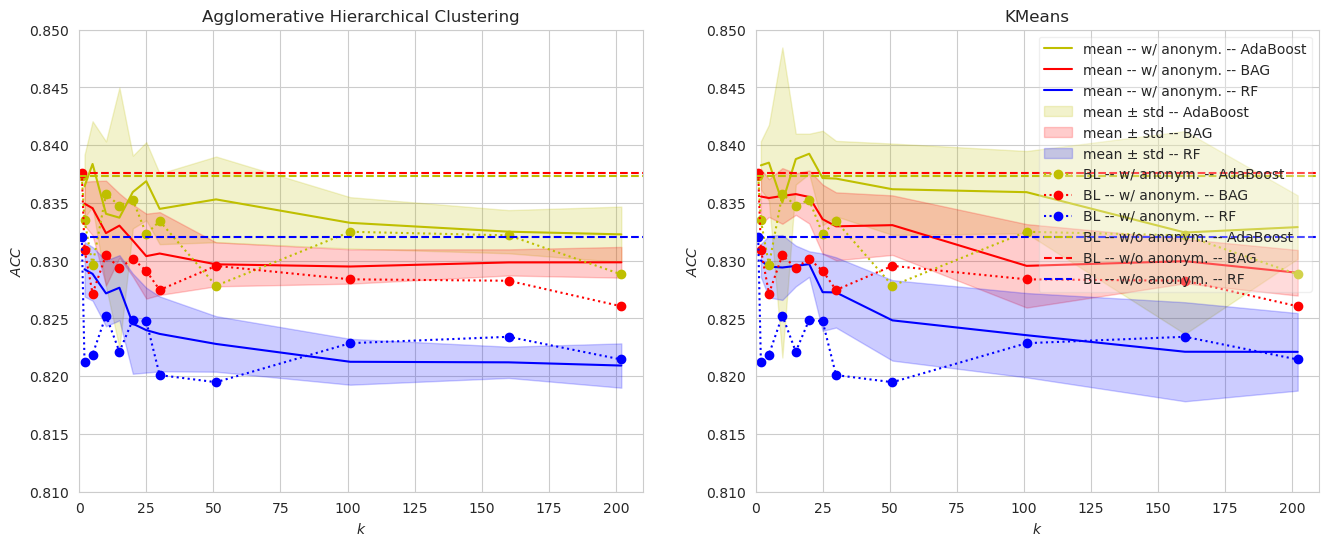

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate mean and uncertainty intervals
def calculate_mean_and_uncertainty(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    return mean, std_dev

# Aggregate data for each ML model across all embeddings
def aggregate_data(embeddings, key):
    return np.array([embedding[key] for embedding in embeddings])

# List of embeddings
embeddings_aggl = [
    aggl_fasttext, aggl_bert, aggl_word2vec, aggl_mistral,
    aggl_averagewordembeddingsglove6B300d, aggl_averagewordembeddingsglove840B300d,
    aggl_multiQaMpnetBaseDotV1, aggl_msMarcoBertBaseDotV5,
    aggl_textEmbedding3Small, aggl_textEmbedding3Large,
    aggl_averageWordEmbeddingsKomninos, aggl_averageWordEmbeddingsLevyDependency,
    aggl_jinaaiJinaEmbeddingsV2BaseEn
]

embeddings_kmeans = [
    kmeans_fasttext, kmeans_bert, kmeans_word2vec, kmeans_mistral,
    kmeans_averagewordembeddingsglove6B300d, kmeans_averagewordembeddingsglove840B300d,
    kmeans_multiQaMpnetBaseDotV1, kmeans_msMarcoBertBaseDotV5,
    kmeans_textEmbedding3Small, kmeans_textEmbedding3Large,
    kmeans_averageWordEmbeddingsKomninos, kmeans_averageWordEmbeddingsLevyDependency,
    kmeans_jinaaiJinaEmbeddingsV2BaseEn
]

# Calculate mean and uncertainty for each ML model
k = baseline['k'][1:]

boosting_aggl = aggregate_data(embeddings_aggl, 'boosting_acc')
bagging_aggl = aggregate_data(embeddings_aggl, 'bagging_acc')
random_forest_aggl = aggregate_data(embeddings_aggl, 'random_forest_acc')

boosting_kmeans = aggregate_data(embeddings_kmeans, 'boosting_acc')
bagging_kmeans = aggregate_data(embeddings_kmeans, 'bagging_acc')
random_forest_kmeans = aggregate_data(embeddings_kmeans, 'random_forest_acc')

boosting_mean_aggl, boosting_std_aggl = calculate_mean_and_uncertainty(boosting_aggl)
bagging_mean_aggl, bagging_std_aggl = calculate_mean_and_uncertainty(bagging_aggl)
random_forest_mean_aggl, random_forest_std_aggl = calculate_mean_and_uncertainty(random_forest_aggl)

boosting_mean_kmeans, boosting_std_kmeans = calculate_mean_and_uncertainty(boosting_kmeans)
bagging_mean_kmeans, bagging_std_kmeans = calculate_mean_and_uncertainty(bagging_kmeans)
random_forest_mean_kmeans, random_forest_std_kmeans = calculate_mean_and_uncertainty(random_forest_kmeans)

# Define the figure and the two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot agglomerative clustering
ax1.plot(k, boosting_mean_aggl, label='mean -- data w/ anonym. -- boosting', linestyle='-', marker='', color='y')
ax1.fill_between(k, boosting_mean_aggl - boosting_std_aggl, boosting_mean_aggl + boosting_std_aggl, color='y', alpha=0.2)

ax1.plot(k, bagging_mean_aggl, label='mean -- data w/ anonym. -- bagging', linestyle='-', marker='', color='r')
ax1.fill_between(k, bagging_mean_aggl - bagging_std_aggl, bagging_mean_aggl + bagging_std_aggl, color='r', alpha=0.2)

ax1.plot(k, random_forest_mean_aggl, label='mean -- data w/ anonym. -- random forest', linestyle='-', marker='', color='b')
ax1.fill_between(k, random_forest_mean_aggl - random_forest_std_aggl, random_forest_mean_aggl + random_forest_std_aggl, color='b', alpha=0.2)

ax1.plot(baseline['k'][:], baseline['boosting_acc'][:], label='baseline -- w/ anonym. -- AdaBoost', linestyle=':', marker='o', color='y')
ax1.plot(baseline['k'][:], baseline['bagging_acc'][:], label='baseline -- w/ anonym. -- BAG', linestyle=':', marker='o', color='r')
ax1.plot(baseline['k'][:], baseline['random_forest_acc'][:], label='baseline -- w/ anonym. -- RF', linestyle=':', marker='o', color='b')

ax1.axhline(y=0.8372950064492353, color='y', linestyle='--', label='baseline -- w/o anonym. -- AdaBoost')
ax1.axhline(y=0.8376021128923284, color='r', linestyle='--', label='baseline -- w/o anonym. -- BAG')
ax1.axhline(y=0.8320127756280327, color='b', linestyle='--', label='baseline -- w/o anonym. -- RF')

ax1.set_ylim(ymin=0.81, ymax=0.85)
ax1.set_xlim(xmin=0, xmax=210)
ax1.set_xlabel('$k$')
ax1.set_ylabel('$ACC$')
ax1.grid(True)
# ax1.legend(loc='lower right')
ax1.set_title('Agglomerative Hierarchical Clustering')

# Plot k-means clustering
ax2.plot(k, boosting_mean_kmeans, label='mean -- w/ anonym. -- AdaBoost', linestyle='-', marker='', color='y')

ax2.plot(k, bagging_mean_kmeans, label='mean -- w/ anonym. -- BAG', linestyle='-', marker='', color='r')

ax2.plot(k, random_forest_mean_kmeans, label='mean -- w/ anonym. -- RF', linestyle='-', marker='', color='b')

ax2.fill_between(k, boosting_mean_kmeans - boosting_std_kmeans, boosting_mean_kmeans + boosting_std_kmeans, color='y', alpha=0.2, label='mean ± std -- AdaBoost')
ax2.fill_between(k, bagging_mean_kmeans - bagging_std_kmeans, bagging_mean_kmeans + bagging_std_kmeans, color='r', alpha=0.2, label='mean ± std -- BAG')
ax2.fill_between(k, random_forest_mean_kmeans - random_forest_std_kmeans, random_forest_mean_kmeans + random_forest_std_kmeans, color='b', alpha=0.2, label='mean ± std -- RF')

ax2.plot(baseline['k'][:], baseline['boosting_acc'][:], label='BL -- w/ anonym. -- AdaBoost', linestyle=':', marker='o', color='y')
ax2.plot(baseline['k'][:], baseline['bagging_acc'][:], label='BL -- w/ anonym. -- BAG', linestyle=':', marker='o', color='r')
ax2.plot(baseline['k'][:], baseline['random_forest_acc'][:], label='BL -- w/ anonym. -- RF', linestyle=':', marker='o', color='b')

ax2.axhline(y=0.8372950064492353, color='y', linestyle='--', label='BL -- w/o anonym. -- AdaBoost')
ax2.axhline(y=0.8376021128923284, color='r', linestyle='--', label='BL -- w/o anonym. -- BAG')
ax2.axhline(y=0.8320127756280327, color='b', linestyle='--', label='BL -- w/o anonym. -- RF')

ax2.set_ylim(ymin=0.81, ymax=0.85)
ax2.set_xlim(xmin=0, xmax=210)
ax2.set_xlabel('$k$')
ax2.set_ylabel('$ACC$')
ax2.grid(True)
ax2.legend(loc='upper right', framealpha=0.3)
ax2.set_title('KMeans')

plt.savefig('model-comparison.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


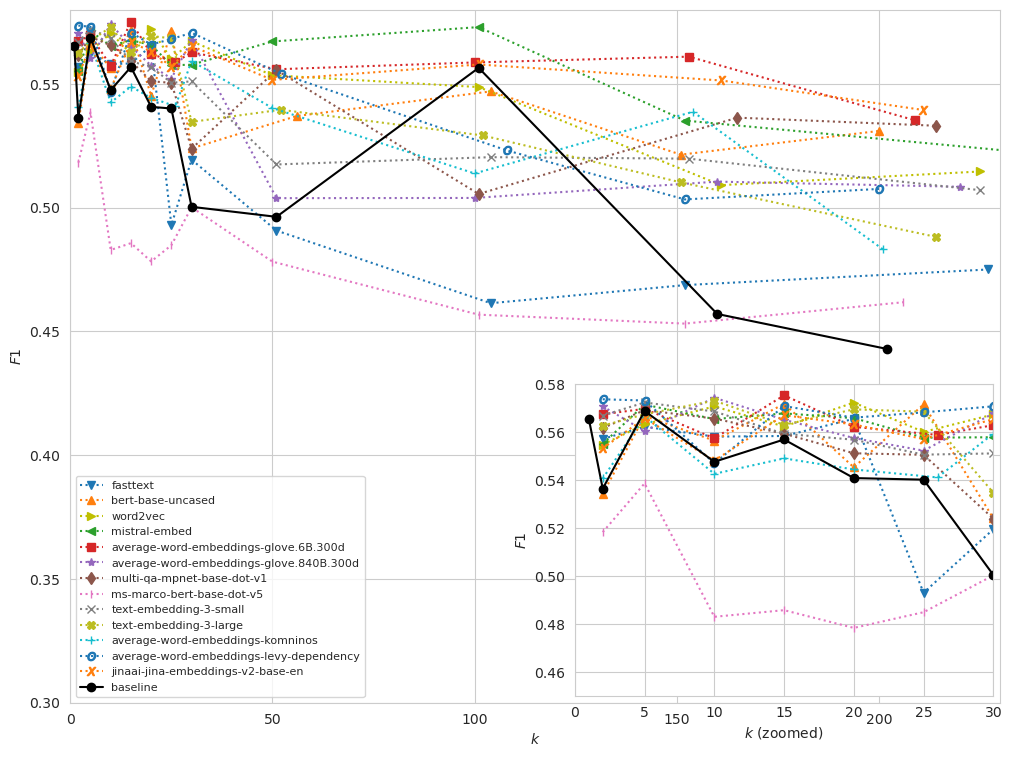

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(12, 9))

# Define the plotting function to avoid repetition
def plot_data(df, name, linestyle, marker, color=None):
    plt.plot(df['k'][:], df['boosting_f1'][:], label=name, linestyle=linestyle, marker=marker, color=color)

# Main plot
plot_data(kmeans_fasttext, "fasttext", ':', 'v')
plot_data(kmeans_bert, "bert-base-uncased", ':', '^')
plot_data(kmeans_word2vec, "word2vec", ':', '>', color="y")
plot_data(kmeans_mistral, "mistral-embed", ':', '<')
plot_data(kmeans_averagewordembeddingsglove6B300d, "average-word-embeddings-glove.6B.300d", ':', 's')
plot_data(kmeans_averagewordembeddingsglove840B300d, "average-word-embeddings-glove.840B.300d", ':', '*')
plot_data(kmeans_multiQaMpnetBaseDotV1, "multi-qa-mpnet-base-dot-v1", ':', 'd')
plot_data(kmeans_msMarcoBertBaseDotV5, "ms-marco-bert-base-dot-v5", ':', '|')
plot_data(kmeans_textEmbedding3Small, "text-embedding-3-small", ':', 'x')
plot_data(kmeans_textEmbedding3Large, "text-embedding-3-large", ':', 'X')
plot_data(kmeans_averageWordEmbeddingsKomninos, "average-word-embeddings-komninos", ':', '+')
plot_data(kmeans_averageWordEmbeddingsLevyDependency, "average-word-embeddings-levy-dependency", ':', '$O$')
plot_data(kmeans_jinaaiJinaEmbeddingsV2BaseEn, "jinaai-jina-embeddings-v2-base-en", ':', '$X$')
plot_data(baseline, "baseline", '-', 'o', 'black')

plt.ylim(0.3, 0.58)
plt.xlim(0, 230)
plt.xlabel('$k$')
plt.ylabel('$F1$')
plt.grid(True)
plt.legend(loc='lower left', fontsize=8)

# Create an inset for the zoomed-in view
ax_inset = inset_axes(plt.gca(), width="45%", height="45%", loc='lower right')
plot_data(kmeans_fasttext, "fasttext", ':', 'v')
plot_data(kmeans_bert, "bert-base-uncased", ':', '^')
plot_data(kmeans_word2vec, "word2vec", ':', '>', color="y")
plot_data(kmeans_mistral, "mistral-embed", ':', '<')
plot_data(kmeans_averagewordembeddingsglove6B300d, "average-word-embeddings-glove.6B.300d", ':', 's')
plot_data(kmeans_averagewordembeddingsglove840B300d, "average-word-embeddings-glove.840B.300d", ':', '*')
plot_data(kmeans_multiQaMpnetBaseDotV1, "multi-qa-mpnet-base-dot-v1", ':', 'd')
plot_data(kmeans_msMarcoBertBaseDotV5, "ms-marco-bert-base-dot-v5", ':', '|')
plot_data(kmeans_textEmbedding3Small, "text-embedding-3-small", ':', 'x')
plot_data(kmeans_textEmbedding3Large, "text-embedding-3-large", ':', 'X')
plot_data(kmeans_averageWordEmbeddingsKomninos, "average-word-embeddings-komninos", ':', '+')
plot_data(kmeans_averageWordEmbeddingsLevyDependency, "average-word-embeddings-levy-dependency", ':', '$O$')
plot_data(kmeans_jinaaiJinaEmbeddingsV2BaseEn, "jinaai-jina-embeddings-v2-base-en", ':', '$X$')
plot_data(baseline, "baseline", '-', 'o', 'black')

ax_inset.set_xlim(0, 30)
ax_inset.set_ylim(0.45, 0.58)
ax_inset.set_xlabel('$k$ (zoomed)')
ax_inset.set_ylabel('$F1$')
ax_inset.grid(True)

plt.show()


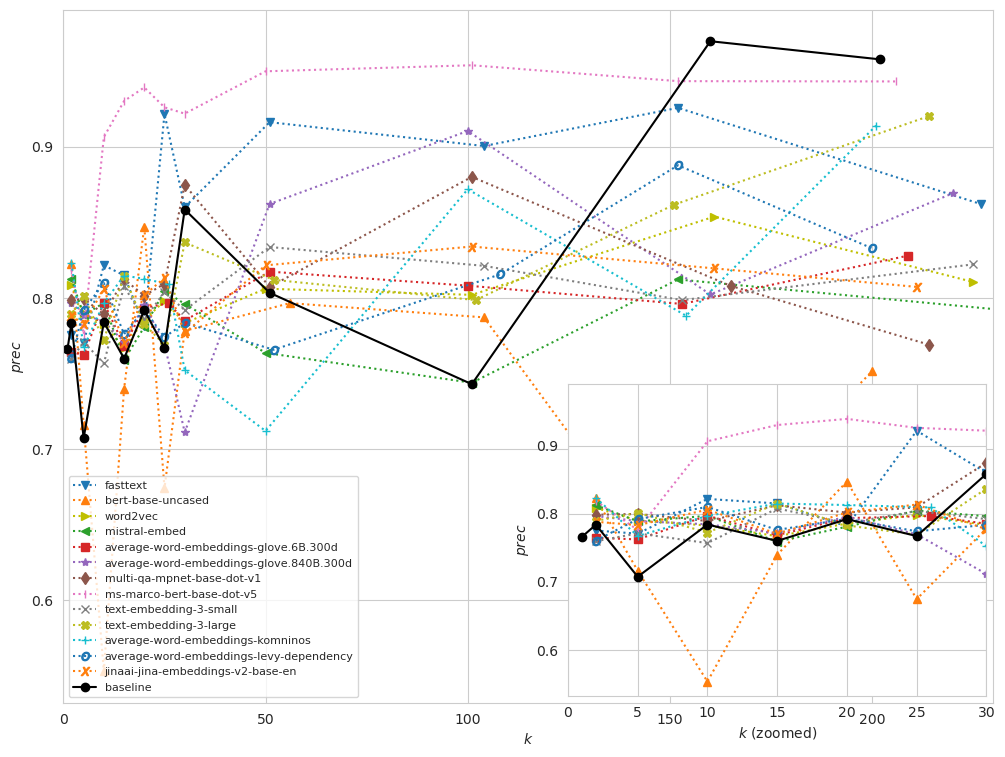

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(12, 9))

# Define the plotting function to avoid repetition
def plot_data(df, name, linestyle, marker, color=None):
    plt.plot(df['k'][:], df['boosting_prec'][:], label=name, linestyle=linestyle, marker=marker, color=color)

# Main plot
plot_data(kmeans_fasttext, "fasttext", ':', 'v')
plot_data(kmeans_bert, "bert-base-uncased", ':', '^')
plot_data(kmeans_word2vec, "word2vec", ':', '>', color="y")
plot_data(kmeans_mistral, "mistral-embed", ':', '<')
plot_data(kmeans_averagewordembeddingsglove6B300d, "average-word-embeddings-glove.6B.300d", ':', 's')
plot_data(kmeans_averagewordembeddingsglove840B300d, "average-word-embeddings-glove.840B.300d", ':', '*')
plot_data(kmeans_multiQaMpnetBaseDotV1, "multi-qa-mpnet-base-dot-v1", ':', 'd')
plot_data(kmeans_msMarcoBertBaseDotV5, "ms-marco-bert-base-dot-v5", ':', '|')
plot_data(kmeans_textEmbedding3Small, "text-embedding-3-small", ':', 'x')
plot_data(kmeans_textEmbedding3Large, "text-embedding-3-large", ':', 'X')
plot_data(kmeans_averageWordEmbeddingsKomninos, "average-word-embeddings-komninos", ':', '+')
plot_data(kmeans_averageWordEmbeddingsLevyDependency, "average-word-embeddings-levy-dependency", ':', '$O$')
plot_data(kmeans_jinaaiJinaEmbeddingsV2BaseEn, "jinaai-jina-embeddings-v2-base-en", ':', '$X$')
plot_data(baseline, "baseline", '-', 'o', 'black')

# plt.ylim(0.3, 0.58)
plt.xlim(0, 230)
plt.xlabel('$k$')
plt.ylabel('$prec$')
plt.grid(True)
plt.legend(loc='lower left', fontsize=8)

# Create an inset for the zoomed-in view
ax_inset = inset_axes(plt.gca(), width="45%", height="45%", loc='lower right')
plot_data(kmeans_fasttext, "fasttext", ':', 'v')
plot_data(kmeans_bert, "bert-base-uncased", ':', '^')
plot_data(kmeans_word2vec, "word2vec", ':', '>', color="y")
plot_data(kmeans_mistral, "mistral-embed", ':', '<')
plot_data(kmeans_averagewordembeddingsglove6B300d, "average-word-embeddings-glove.6B.300d", ':', 's')
plot_data(kmeans_averagewordembeddingsglove840B300d, "average-word-embeddings-glove.840B.300d", ':', '*')
plot_data(kmeans_multiQaMpnetBaseDotV1, "multi-qa-mpnet-base-dot-v1", ':', 'd')
plot_data(kmeans_msMarcoBertBaseDotV5, "ms-marco-bert-base-dot-v5", ':', '|')
plot_data(kmeans_textEmbedding3Small, "text-embedding-3-small", ':', 'x')
plot_data(kmeans_textEmbedding3Large, "text-embedding-3-large", ':', 'X')
plot_data(kmeans_averageWordEmbeddingsKomninos, "average-word-embeddings-komninos", ':', '+')
plot_data(kmeans_averageWordEmbeddingsLevyDependency, "average-word-embeddings-levy-dependency", ':', '$O$')
plot_data(kmeans_jinaaiJinaEmbeddingsV2BaseEn, "jinaai-jina-embeddings-v2-base-en", ':', '$X$')
plot_data(baseline, "baseline", '-', 'o', 'black')

ax_inset.set_xlim(0, 30)
# ax_inset.set_ylim(0.45, 0.58)
ax_inset.set_xlabel('$k$ (zoomed)')
ax_inset.set_ylabel('$prec$')
ax_inset.grid(True)

plt.show()


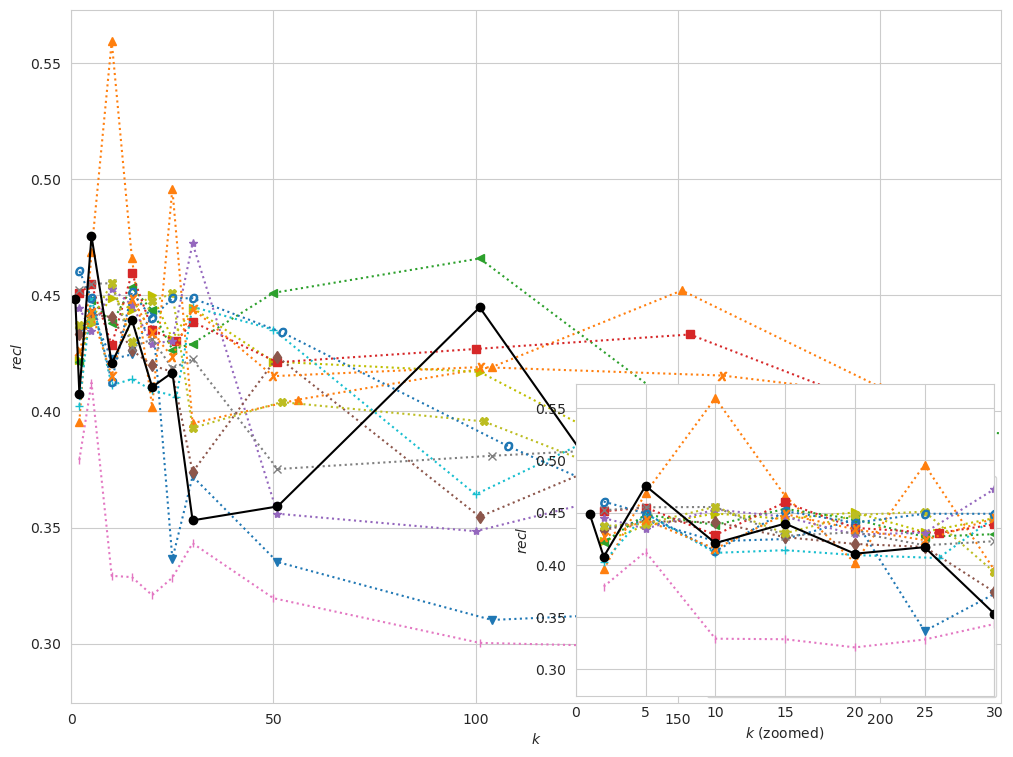

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(12, 9))

# Define the plotting function to avoid repetition
def plot_data(df, name, linestyle, marker, color=None):
    plt.plot(df['k'][:], df['boosting_recl'][:], label=name, linestyle=linestyle, marker=marker, color=color)

# Main plot
plot_data(kmeans_fasttext, "fasttext", ':', 'v')
plot_data(kmeans_bert, "bert-base-uncased", ':', '^')
plot_data(kmeans_word2vec, "word2vec", ':', '>', color="y")
plot_data(kmeans_mistral, "mistral-embed", ':', '<')
plot_data(kmeans_averagewordembeddingsglove6B300d, "average-word-embeddings-glove.6B.300d", ':', 's')
plot_data(kmeans_averagewordembeddingsglove840B300d, "average-word-embeddings-glove.840B.300d", ':', '*')
plot_data(kmeans_multiQaMpnetBaseDotV1, "multi-qa-mpnet-base-dot-v1", ':', 'd')
plot_data(kmeans_msMarcoBertBaseDotV5, "ms-marco-bert-base-dot-v5", ':', '|')
plot_data(kmeans_textEmbedding3Small, "text-embedding-3-small", ':', 'x')
plot_data(kmeans_textEmbedding3Large, "text-embedding-3-large", ':', 'X')
plot_data(kmeans_averageWordEmbeddingsKomninos, "average-word-embeddings-komninos", ':', '+')
plot_data(kmeans_averageWordEmbeddingsLevyDependency, "average-word-embeddings-levy-dependency", ':', '$O$')
plot_data(kmeans_jinaaiJinaEmbeddingsV2BaseEn, "jinaai-jina-embeddings-v2-base-en", ':', '$X$')
plot_data(baseline, "baseline", '-', 'o', 'black')

# plt.ylim(0.3, 0.58)
plt.xlim(0, 230)
plt.xlabel('$k$')
plt.ylabel('$recl$')
plt.grid(True)
plt.legend(loc='lower right', fontsize=8)

# Create an inset for the zoomed-in view
ax_inset = inset_axes(plt.gca(), width="45%", height="45%", loc='lower right')
plot_data(kmeans_fasttext, "fasttext", ':', 'v')
plot_data(kmeans_bert, "bert-base-uncased", ':', '^')
plot_data(kmeans_word2vec, "word2vec", ':', '>', color="y")
plot_data(kmeans_mistral, "mistral-embed", ':', '<')
plot_data(kmeans_averagewordembeddingsglove6B300d, "average-word-embeddings-glove.6B.300d", ':', 's')
plot_data(kmeans_averagewordembeddingsglove840B300d, "average-word-embeddings-glove.840B.300d", ':', '*')
plot_data(kmeans_multiQaMpnetBaseDotV1, "multi-qa-mpnet-base-dot-v1", ':', 'd')
plot_data(kmeans_msMarcoBertBaseDotV5, "ms-marco-bert-base-dot-v5", ':', '|')
plot_data(kmeans_textEmbedding3Small, "text-embedding-3-small", ':', 'x')
plot_data(kmeans_textEmbedding3Large, "text-embedding-3-large", ':', 'X')
plot_data(kmeans_averageWordEmbeddingsKomninos, "average-word-embeddings-komninos", ':', '+')
plot_data(kmeans_averageWordEmbeddingsLevyDependency, "average-word-embeddings-levy-dependency", ':', '$O$')
plot_data(kmeans_jinaaiJinaEmbeddingsV2BaseEn, "jinaai-jina-embeddings-v2-base-en", ':', '$X$')
plot_data(baseline, "baseline", '-', 'o', 'black')

ax_inset.set_xlim(0, 30)
# ax_inset.set_ylim(0.45, 0.58)
ax_inset.set_xlabel('$k$ (zoomed)')
ax_inset.set_ylabel('$recl$')
ax_inset.grid(True)

plt.show()


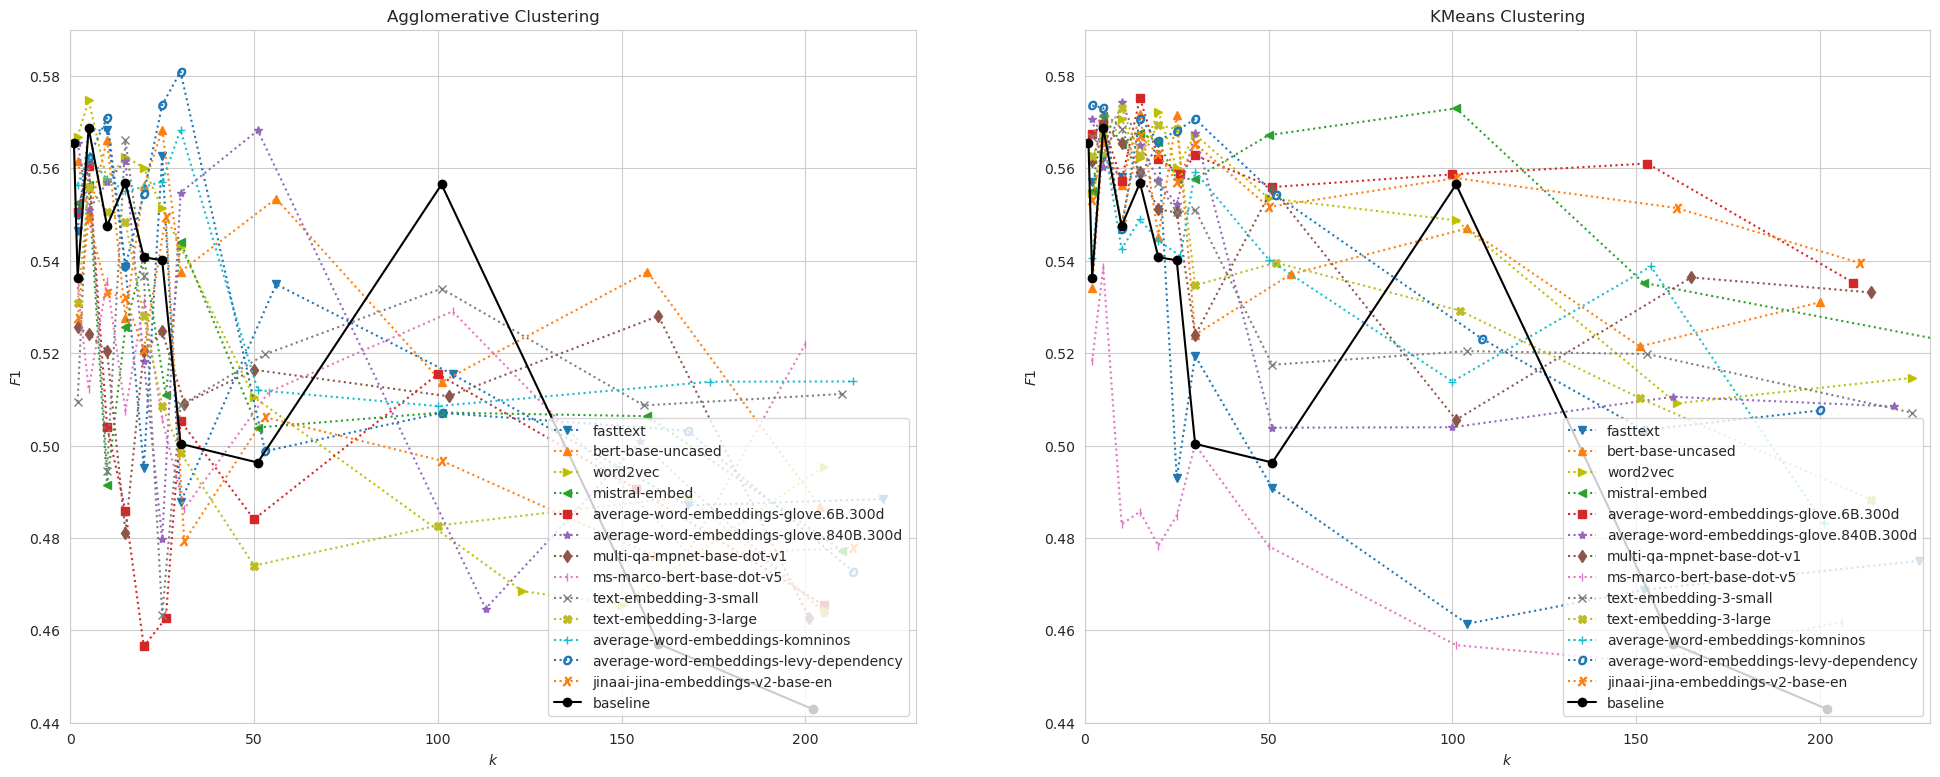

In [40]:
import matplotlib.pyplot as plt

# Define the figure and the two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

# Plot the first set of data
ax1.plot(aggl_fasttext['k'][:], aggl_fasttext['boosting_f1'][:], label="fasttext", linestyle=':', marker='v')
ax1.plot(aggl_bert['k'][:], aggl_bert['boosting_f1'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax1.plot(aggl_word2vec['k'][:], aggl_word2vec['boosting_f1'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax1.plot(aggl_mistral['k'][:], aggl_mistral['boosting_f1'][:], label="mistral-embed", linestyle=':', marker='<')
ax1.plot(aggl_averagewordembeddingsglove6B300d['k'][:], aggl_averagewordembeddingsglove6B300d['boosting_f1'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax1.plot(aggl_averagewordembeddingsglove840B300d['k'][:], aggl_averagewordembeddingsglove840B300d['boosting_f1'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax1.plot(aggl_multiQaMpnetBaseDotV1['k'][:], aggl_multiQaMpnetBaseDotV1['boosting_f1'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax1.plot(aggl_msMarcoBertBaseDotV5['k'][:], aggl_msMarcoBertBaseDotV5['boosting_f1'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax1.plot(aggl_textEmbedding3Small['k'][:], aggl_textEmbedding3Small['boosting_f1'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax1.plot(aggl_textEmbedding3Large['k'][:], aggl_textEmbedding3Large['boosting_f1'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax1.plot(aggl_averageWordEmbeddingsKomninos['k'][:], aggl_averageWordEmbeddingsKomninos['boosting_f1'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax1.plot(aggl_averageWordEmbeddingsLevyDependency['k'][:], aggl_averageWordEmbeddingsLevyDependency['boosting_f1'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax1.plot(aggl_jinaaiJinaEmbeddingsV2BaseEn['k'][:], aggl_jinaaiJinaEmbeddingsV2BaseEn['boosting_f1'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax1.plot(baseline['k'][:], baseline['boosting_f1'][:], label='baseline', linestyle='-', marker='o', color='black')

ax1.set_ylim(ymin=0.44, ymax=0.59)
ax1.set_xlim(xmin=0, xmax=230)

ax1.set_xlabel('$k$')
ax1.set_ylabel('$F1$')
ax1.grid(True)
ax1.legend(loc='lower right')
ax1.set_title('Agglomerative Clustering')

# Plot the second set of data
ax2.plot(kmeans_fasttext['k'][:], kmeans_fasttext['boosting_f1'][:], label="fasttext", linestyle=':', marker='v')
ax2.plot(kmeans_bert['k'][:], kmeans_bert['boosting_f1'][:], label="bert-base-uncased", linestyle=':', marker='^')
ax2.plot(kmeans_word2vec['k'][:], kmeans_word2vec['boosting_f1'][:], label="word2vec", linestyle=':', marker='>', color="y")
ax2.plot(kmeans_mistral['k'][:], kmeans_mistral['boosting_f1'][:], label="mistral-embed", linestyle=':', marker='<')
ax2.plot(kmeans_averagewordembeddingsglove6B300d['k'][:], kmeans_averagewordembeddingsglove6B300d['boosting_f1'][:], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
ax2.plot(kmeans_averagewordembeddingsglove840B300d['k'][:], kmeans_averagewordembeddingsglove840B300d['boosting_f1'][:], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
ax2.plot(kmeans_multiQaMpnetBaseDotV1['k'][:], kmeans_multiQaMpnetBaseDotV1['boosting_f1'][:], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
ax2.plot(kmeans_msMarcoBertBaseDotV5['k'][:], kmeans_msMarcoBertBaseDotV5['boosting_f1'][:], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
ax2.plot(kmeans_textEmbedding3Small['k'][:], kmeans_textEmbedding3Small['boosting_f1'][:], label="text-embedding-3-small", linestyle=':', marker='x')
ax2.plot(kmeans_textEmbedding3Large['k'][:], kmeans_textEmbedding3Large['boosting_f1'][:], label="text-embedding-3-large", linestyle=':', marker='X')
ax2.plot(kmeans_averageWordEmbeddingsKomninos['k'][:], kmeans_averageWordEmbeddingsKomninos['boosting_f1'][:], label="average-word-embeddings-komninos", linestyle=':', marker='+')
ax2.plot(kmeans_averageWordEmbeddingsLevyDependency['k'][:], kmeans_averageWordEmbeddingsLevyDependency['boosting_f1'][:], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
ax2.plot(kmeans_jinaaiJinaEmbeddingsV2BaseEn['k'][:], kmeans_jinaaiJinaEmbeddingsV2BaseEn['boosting_f1'][:], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
ax2.plot(baseline['k'][:], baseline['boosting_f1'][:], label='baseline', linestyle='-', marker='o', color='black')


ax2.set_ylim(ymin=0.44, ymax=0.59)
ax2.set_xlim(xmin=0, xmax=230)

ax2.set_xlabel('$k$')
ax2.set_ylabel('$F1$')
ax2.grid(True)
ax2.legend(loc='lower right')
ax2.set_title('KMeans Clustering')

# Show the plot
plt.show()


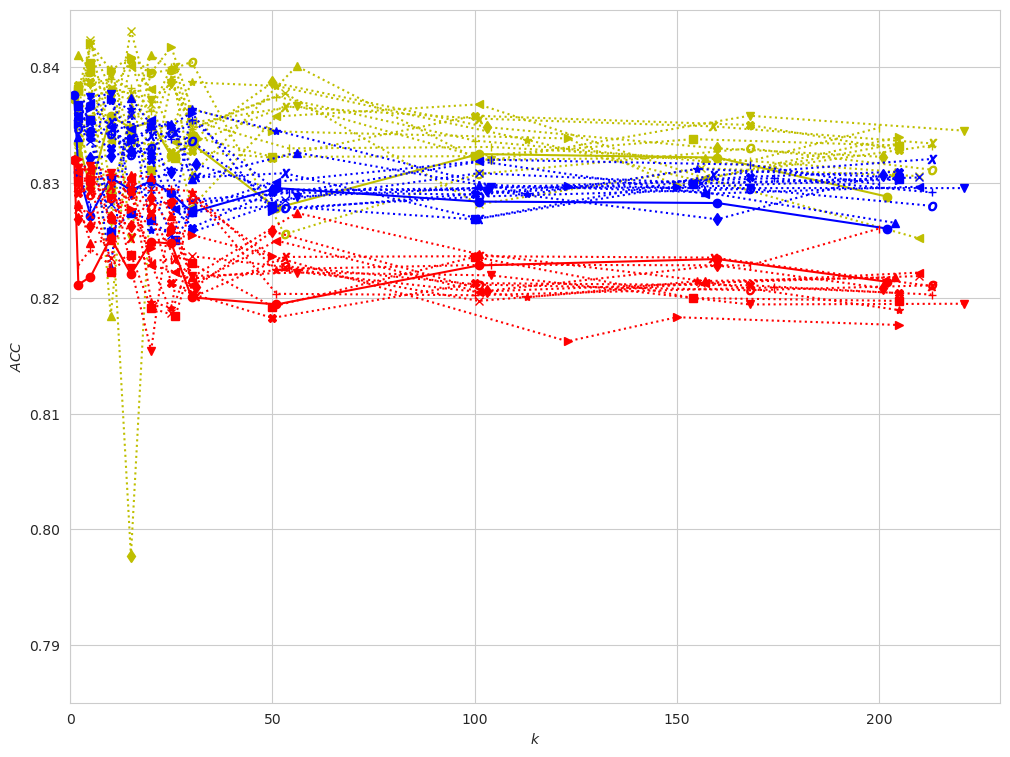

In [41]:
plt.figure(figsize=(12, 9))

row_start = 0
row_end = 20
  
df = aggl_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='v', color="y")

df = aggl_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='^', color="y")

df = aggl_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='>', color="y")

df = aggl_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='<', color="y")

df = aggl_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='s', color="y")

df = aggl_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='*', color="y")

df = aggl_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='d', color="y")

df = aggl_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='|', color="y")

df = aggl_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='x', color="y")

df = aggl_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='X', color="y")

df = aggl_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='+', color="y")

df = aggl_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='$O$', color="y")

df = aggl_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='$X$', color="y")



plt.plot(baseline['k'][:], baseline['boosting_acc'][:], label='baseline', linestyle='-', marker='o', color="y")

df = aggl_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='v', color="b")

df = aggl_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='^', color="b")

df = aggl_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='>', color="b")

df = aggl_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='<', color="b")

df = aggl_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='s', color="b")

df = aggl_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='*', color="b")

df = aggl_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='d', color="b")

df = aggl_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='|', color="b")

df = aggl_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='x', color="b")

df = aggl_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='X', color="b")

df = aggl_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='+', color="b")

df = aggl_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='$O$', color="b")

df = aggl_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='$X$', color="b")


plt.plot(baseline['k'][:], baseline['bagging_acc'][:], label='baseline', linestyle='-', marker='o', color="b")


df = aggl_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='v', color="r")

df = aggl_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='^', color="r")

df = aggl_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='>', color="r")

df = aggl_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='<', color="r")

df = aggl_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='s', color="r")

df = aggl_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='*', color="r")

df = aggl_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='d', color="r")

df = aggl_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='|', color="r")

df = aggl_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='x', color="r")

df = aggl_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='X', color="r")

df = aggl_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='+', color="r")

df = aggl_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='$O$', color="r")

df = aggl_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='$X$', color="r")

plt.ylim(ymin=0.785, ymax=0.845) 
plt.xlim(xmin=0, xmax=230) 

plt.plot(baseline['k'][:], baseline['random_forest_acc'][:], label='baseline', linestyle='-', marker='o', color="r")


plt.xlabel('$k$')
plt.ylabel('$ACC$')
plt.grid(True)
# plt.legend(loc='lower right')
plt.show()

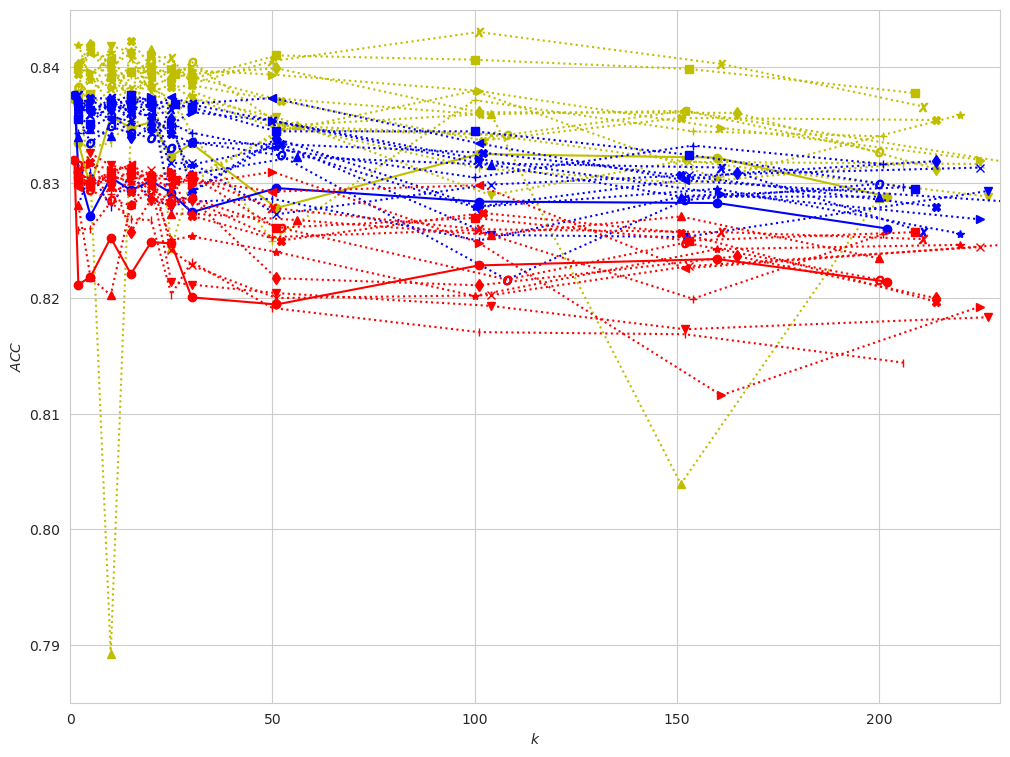

In [42]:
plt.figure(figsize=(12, 9))

row_start = 0
row_end = 20
  
df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='v', color="y")

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='^', color="y")

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='<', color="y")

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='s', color="y")

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='*', color="y")

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='d', color="y")

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='|', color="y")

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='x', color="y")

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='X', color="y")

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='+', color="y")

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='$O$', color="y")

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['boosting_acc'][:], label=name, linestyle=':', marker='$X$', color="y")



plt.plot(baseline['k'][:], baseline['boosting_acc'][:], label='baseline', linestyle='-', marker='o', color="y")

df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='v', color="b")

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='^', color="b")

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='>', color="b")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='<', color="b")

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='s', color="b")

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='*', color="b")

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='d', color="b")

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='|', color="b")

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='x', color="b")

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='X', color="b")

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='+', color="b")

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='$O$', color="b")

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['bagging_acc'][:], label=name, linestyle=':', marker='$X$', color="b")


plt.plot(baseline['k'][:], baseline['bagging_acc'][:], label='baseline', linestyle='-', marker='o', color="b")


df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='v', color="r")

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='^', color="r")

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='>', color="r")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='<', color="r")

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='s', color="r")

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='*', color="r")

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='d', color="r")

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='|', color="r")

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='x', color="r")

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='X', color="r")

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='+', color="r")

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='$O$', color="r")

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['random_forest_acc'][:], label=name, linestyle=':', marker='$X$', color="r")

plt.ylim(ymin=0.785, ymax=0.845) 
plt.xlim(xmin=0, xmax=230) 

plt.plot(baseline['k'][:], baseline['random_forest_acc'][:], label='baseline', linestyle='-', marker='o', color="r")


plt.xlabel('$k$')
plt.ylabel('$ACC$')
plt.grid(True)
# plt.legend(loc='lower right')
plt.show()

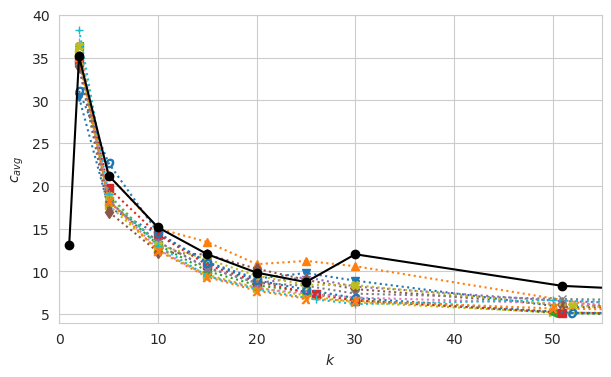

In [43]:
plt.figure(figsize=(7,4))
row_start = 0
row_end = 20

df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=4, ymax=40)
plt.xlim(xmin=0, xmax=55)

plt.plot(baseline['k'][:], baseline['c_avg'][:], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$c_{avg}$')
plt.grid(True)

# plt.legend(loc='upper right', fontsize=7, framealpha=0.3)

plt.savefig('c_avg_small.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [44]:
plt.figure(figsize=(7,4))
row_start = 0
row_end = 20

df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['f1'][:], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=4, ymax=40)
plt.xlim(xmin=0, xmax=55)

plt.plot(baseline['k'][:], baseline['f1'][:], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$F1$')
plt.grid(True)

plt.legend(loc='upper right', fontsize=7, framealpha=0.3)

plt.savefig('F1_small.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

KeyError: 'f1'

<Figure size 700x400 with 0 Axes>

In [ ]:
# Create a quadratic legend figure with labels all below each other with less border
fig_legend = plt.figure(figsize=(7,4))
plt.plot([], [], label="fasttext", linestyle=':', marker='v')
plt.plot([], [], label="bert-base-uncased", linestyle=':', marker='^')
plt.plot([], [], label="word2vec", linestyle=':', marker='>', color="y")
plt.plot([], [], label="mistral-embed", linestyle=':', marker='<')
plt.plot([], [], label="average-word-embeddings-glove.6B.300d", linestyle=':', marker='s')
plt.plot([], [], label="average-word-embeddings-glove.840B.300d", linestyle=':', marker='*')
plt.plot([], [], label="multi-qa-mpnet-base-dot-v1", linestyle=':', marker='d')
plt.plot([], [], label="ms-marco-bert-base-dot-v5", linestyle=':', marker='|')
plt.plot([], [], label="text-embedding-3-small", linestyle=':', marker='x')
plt.plot([], [], label="text-embedding-3-large", linestyle=':', marker='X')
plt.plot([], [], label="average-word-embeddings-komninos", linestyle=':', marker='+')
plt.plot([], [], label="average-word-embeddings-levy-dependency", linestyle=':', marker='$O$')
plt.plot([], [], label="jinaai-jina-embeddings-v2-base-en", linestyle=':', marker='$X$')
plt.plot([], [], label='baseline', linestyle='-', marker='o', color='black')

plt.legend(loc='center', ncol=1)
plt.axis('off')

# Save the legend figure to a file
fig_legend.savefig('embedding_comparison_legend_quadratic_vertical_less_border.png', dpi=300, bbox_inches='tight', pad_inches=1)

# Display the legend figure
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
row_start = 0
row_end = 20
  
df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['c_avg'][:], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0, ymax=40) 
plt.xlim(xmin=0, xmax=230) 

plt.plot(baseline['k'][:], baseline['c_avg'][:], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$c_{avg}$')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
row_start = 0
row_end = 20
  
df = aggl_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='v')

df = aggl_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='^')

df = aggl_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='>', color="y")

df = aggl_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='<')

df = aggl_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='s')

df = aggl_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='*')

df = aggl_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='d')

df = aggl_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='|')

df = aggl_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='x')

df = aggl_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='X')

df = aggl_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='+')

df = aggl_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='$O$')

df = aggl_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.7, ymax=1) 
plt.xlim(xmin=0, xmax=230) 

plt.plot(baseline['k'][:], baseline['perc_recs'][:], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$perc\_recs$')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:

plt.figure(figsize=(7,4))
row_start = 0
row_end = 20
  
df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.85, ymax=1)
plt.xlim(xmin=0, xmax=55)

plt.plot(baseline['k'][:], baseline['perc_recs'][:], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$perc\_recs$')
plt.grid(True)
# plt.legend(loc='upper right')

plt.savefig('perc_recs_small.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [ ]:

plt.figure(figsize=(12, 12))
row_start = 0
row_end = 20

df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['perc_recs'][:], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.85, ymax=1)
plt.xlim(xmin=0, xmax=55)

plt.plot(baseline['k'][:], baseline['perc_recs'][:], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$perc\_recs$')
plt.grid(True)
# plt.legend(loc='upper right')

# fig_legend.savefig('perc_recs_small.png', dpi=300, bbox_inches='tight', pad_inches=1)

plt.show()

In [ ]:

plt.figure(figsize=(12, 9))
row_start = 0
row_end = 20
  
df = aggl_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='v')

df = aggl_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='^')

df = aggl_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='>', color="y")

df = aggl_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='<')

df = aggl_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='s')

df = aggl_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='*')

df = aggl_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='d')

df = aggl_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='|')

df = aggl_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='x')

df = aggl_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='X')

df = aggl_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='+')

df = aggl_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='$O$')

df = aggl_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.25, ymax=0.8) 
plt.xlim(xmin=0, xmax=230) 

plt.plot(baseline['k'][:], baseline['t'][:], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$t$')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:

plt.figure(figsize=(12, 9))
row_start = 0
row_end = 20
  
df = kmeans_fasttext
name = "fasttext"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='v')

df = kmeans_bert
name = "bert-base-uncased"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='^')

df = kmeans_word2vec
name = "word2vec"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='>', color="y")

df = kmeans_mistral
name = "mistral-embed"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='<')

df = kmeans_averagewordembeddingsglove6B300d
name = "average-word-embeddings-glove.6B.300d"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='s')

df = kmeans_averagewordembeddingsglove840B300d
name = "average-word-embeddings-glove.840B.300d"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='*')

df = kmeans_multiQaMpnetBaseDotV1
name = "multi-qa-mpnet-base-dot-v1"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='d')

df = kmeans_msMarcoBertBaseDotV5
name = "ms-marco-bert-base-dot-v5"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='|')

df = kmeans_textEmbedding3Small
name = "text-embedding-3-small"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='x')

df = kmeans_textEmbedding3Large
name = "text-embedding-3-large"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='X')

df = kmeans_averageWordEmbeddingsKomninos
name = "average-word-embeddings-komninos"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='+')

df = kmeans_averageWordEmbeddingsLevyDependency
name = "average-word-embeddings-levy-dependency"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='$O$')

df = kmeans_jinaaiJinaEmbeddingsV2BaseEn
name = "jinaai-jina-embeddings-v2-base-en"
plt.plot(df['k'][:], df['t'][:], label=name, linestyle=':', marker='$X$')

plt.ylim(ymin=0.25, ymax=0.8) 
plt.xlim(xmin=0, xmax=230) 

plt.plot(baseline['k'][:], baseline['t'][:], label='baseline', linestyle='-', marker='o', color='black')


plt.xlabel('$k$')
plt.ylabel('$t$')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()